**Problem:**

For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.


Performing the analysis on **Rose.csv** dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode()
%matplotlib inline
import seaborn as sns
from pylab import rcParams

In [ ]:
df_1 = pd.read_csv("/content/drive/My Drive/GL-DSBA-20-21/Time Series/Project/Rose.csv")

In [ ]:
df_1.head()

YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0

In [ ]:
df_1.tail()

YearMonth  Rose
182   1995-03  45.0
183   1995-04  52.0
184   1995-05  28.0
185   1995-06  40.0
186   1995-07  62.0

In [ ]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')

In [ ]:
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [ ]:
df_1['Time_Stamp'] = pd.DataFrame(date,columns=['YearMonth'])
df_1.head()

YearMonth   Rose Time_Stamp
0   1980-01  112.0 1980-01-31
1   1980-02  118.0 1980-02-29
2   1980-03  129.0 1980-03-31
3   1980-04   99.0 1980-04-30
4   1980-05  116.0 1980-05-31

In [ ]:
df_1.tail()

YearMonth  Rose Time_Stamp
182   1995-03  45.0 1995-03-31
183   1995-04  52.0 1995-04-30
184   1995-05  28.0 1995-05-31
185   1995-06  40.0 1995-06-30
186   1995-07  62.0 1995-07-31

In [ ]:
rcParams['figure.figsize'] = 20,8

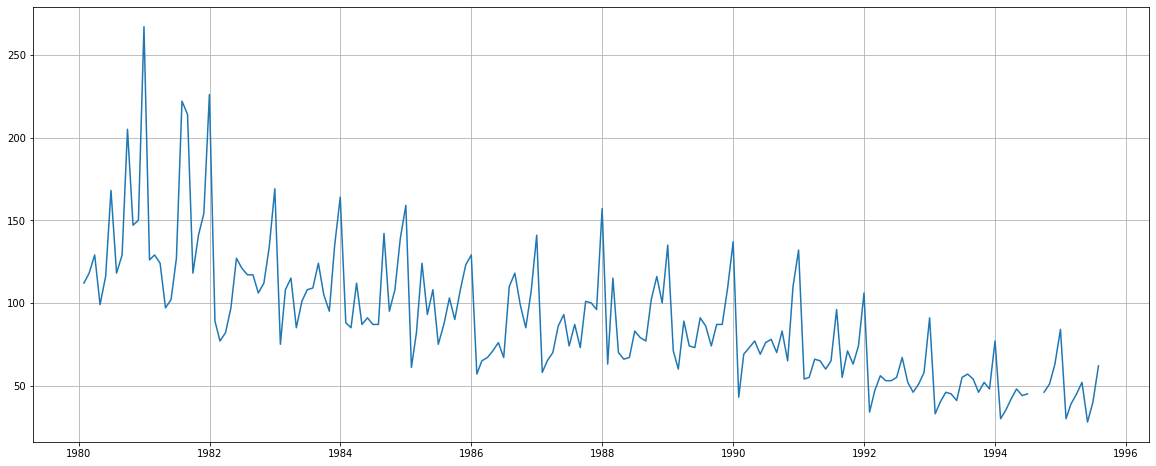

In [ ]:
plt.plot(df_1['Time_Stamp'],df_1['Rose']);
plt.grid();


In [ ]:
df_1.describe()

Rose
count  185.000000
mean    90.394595
std     39.175344
min     28.000000
25%     63.000000
50%     86.000000
75%    112.000000
max    267.000000

In [ ]:
df_1.set_index('Time_Stamp',inplace=True)
df_1.head()

YearMonth   Rose
Time_Stamp                 
1980-01-31   1980-01  112.0
1980-02-29   1980-02  118.0
1980-03-31   1980-03  129.0
1980-04-30   1980-04   99.0
1980-05-31   1980-05  116.0

In [ ]:
df_1.drop(['YearMonth'], axis = 1, inplace = True) 
df_1.head()

Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

In [ ]:
df_1.tail()

Rose
Time_Stamp      
1995-03-31  45.0
1995-04-30  52.0
1995-05-31  28.0
1995-06-30  40.0
1995-07-31  62.0

In [ ]:
df_1.isnull().sum()

Rose    2
dtype: int64

In [ ]:
is_NaN = df_1.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df_1[row_has_NaN]

print(rows_with_NaN)


            Rose
Time_Stamp      
1994-07-31   NaN
1994-08-31   NaN


In [ ]:
df_missing_value = df_1.replace(to_replace=62.0,value=np.NaN)

In [ ]:
df_missing_value.isna().sum()

Rose    3
dtype: int64

In [ ]:
df_missing_value.interpolate()['1995'].tail()

Rose
Time_Stamp      
1995-03-31  45.0
1995-04-30  52.0
1995-05-31  28.0
1995-06-30  40.0
1995-07-31  40.0

In [ ]:
df_missing_value.interpolate(method='spline',order=1)['1995'].tail()

Rose
Time_Stamp           
1995-03-31  45.000000
1995-04-30  52.000000
1995-05-31  28.000000
1995-06-30  40.000000
1995-07-31  52.083318

In [ ]:
df_missing_value.interpolate(method='pad')['1995'].tail()

Rose
Time_Stamp      
1995-03-31  45.0
1995-04-30  52.0
1995-05-31  28.0
1995-06-30  40.0
1995-07-31  40.0

In [ ]:
df_missing_value.interpolate(method='spline',order=2)['1995'].tail()

Rose
Time_Stamp          
1995-03-31  45.00000
1995-04-30  52.00000
1995-05-31  28.00000
1995-06-30  40.00000
1995-07-31  99.59984

In [ ]:
is_NaN = df_1.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df_1[row_has_NaN]

print(rows_with_NaN)

            Rose
Time_Stamp      
1994-07-31   NaN
1994-08-31   NaN


In [ ]:
df_1['1994']

Rose
Time_Stamp      
1994-01-31  30.0
1994-02-28  35.0
1994-03-31  42.0
1994-04-30  48.0
1994-05-31  44.0
1994-06-30  45.0
1994-07-31   NaN
1994-08-31   NaN
1994-09-30  46.0
1994-10-31  51.0
1994-11-30  63.0
1994-12-31  84.0

In [ ]:
df_1['Rose'].interpolate(method='spline',order=1, inplace = True)

In [ ]:
df_1['1994']

Rose
Time_Stamp           
1994-01-31  30.000000
1994-02-28  35.000000
1994-03-31  42.000000
1994-04-30  48.000000
1994-05-31  44.000000
1994-06-30  45.000000
1994-07-31  46.155493
1994-08-31  47.221907
1994-09-30  46.000000
1994-10-31  51.000000
1994-11-30  63.000000
1994-12-31  84.000000

In [ ]:
df_1.isnull().sum()

Rose    0
dtype: int64

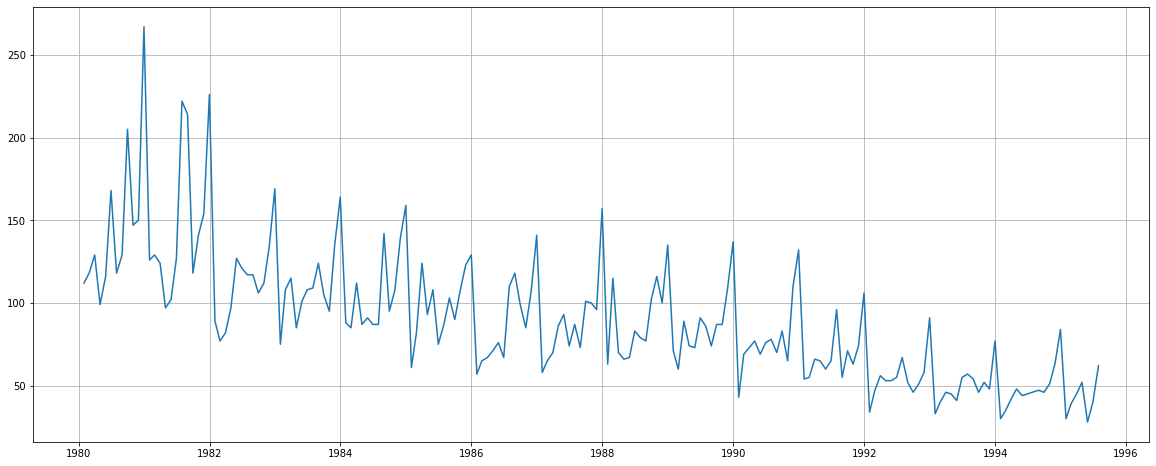

In [ ]:
plt.plot(df_1);
plt.grid();

In [ ]:
df_1.describe()

Rose
count  187.000000
mean    89.927152
std     39.224081
min     28.000000
25%     62.500000
50%     85.000000
75%    111.000000
max    267.000000

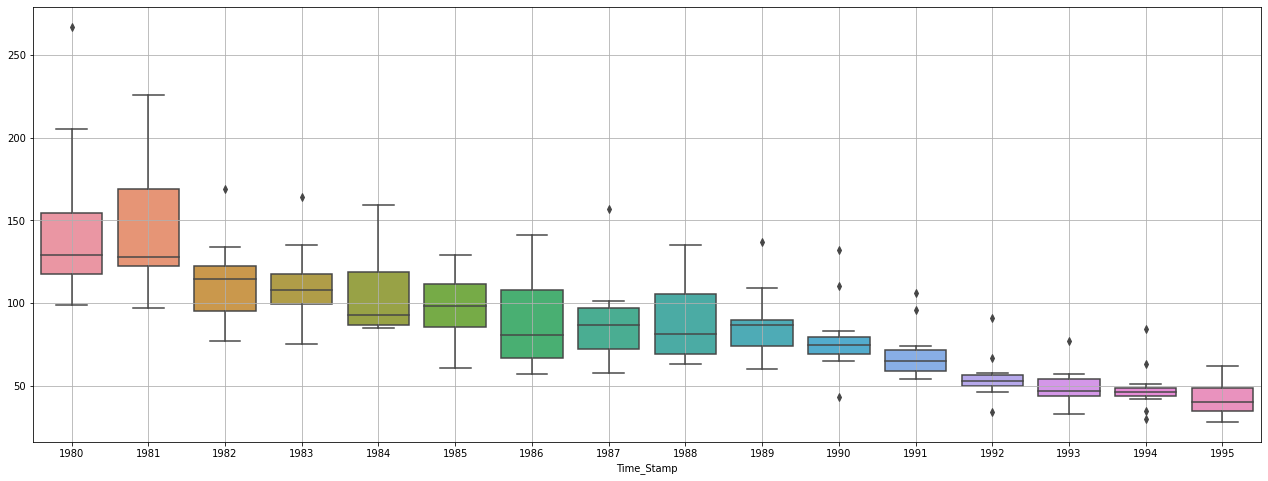

In [ ]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df_1.index.year,y = df_1.values[:,0],ax=ax)
plt.grid();

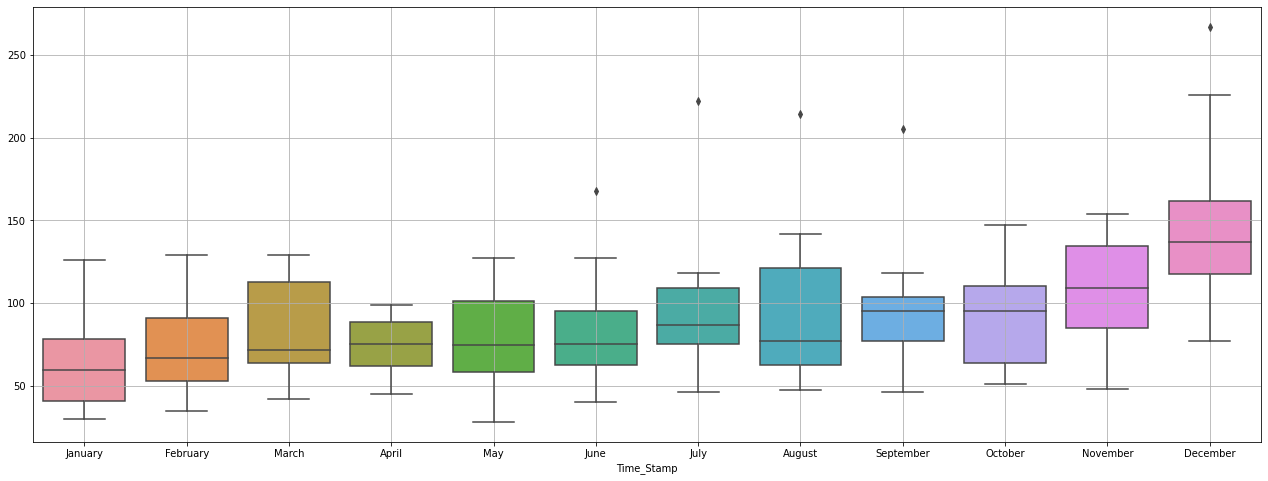

In [ ]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df_1.index.month_name(),y = df_1.values[:,0],ax=ax)
plt.grid();

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



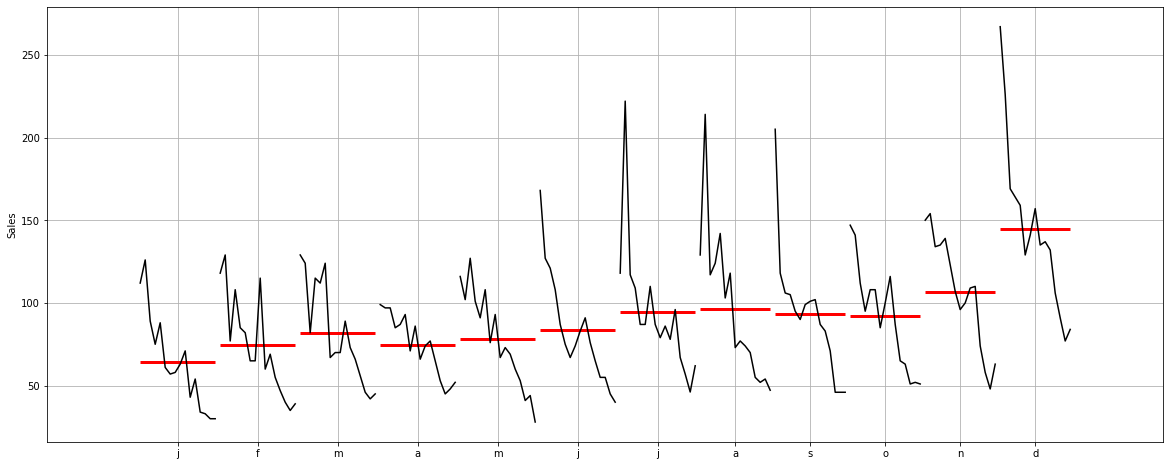

In [ ]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(df_1['Rose'],ylabel='Sales')
plt.grid();

In [ ]:
monthly_sales_across_years = pd.pivot_table(df_1, values = 'Rose', columns = df_1.index.month, index = df_1.index.year)
monthly_sales_across_years

Time_Stamp     1      2      3     4   ...     9      10     11     12
Time_Stamp                             ...                            
1980        112.0  118.0  129.0  99.0  ...  205.0  147.0  150.0  267.0
1981        126.0  129.0  124.0  97.0  ...  118.0  141.0  154.0  226.0
1982         89.0   77.0   82.0  97.0  ...  106.0  112.0  134.0  169.0
1983         75.0  108.0  115.0  85.0  ...  105.0   95.0  135.0  164.0
1984         88.0   85.0  112.0  87.0  ...   95.0  108.0  139.0  159.0
1985         61.0   82.0  124.0  93.0  ...   90.0  108.0  123.0  129.0
1986         57.0   65.0   67.0  71.0  ...   99.0   85.0  107.0  141.0
1987         58.0   65.0   70.0  86.0  ...  101.0  100.0   96.0  157.0
1988         63.0  115.0   70.0  66.0  ...  102.0  116.0  100.0  135.0
1989         71.0   60.0   89.0  74.0  ...   87.0   87.0  109.0  137.0
1990         43.0   69.0   73.0  77.0  ...   83.0   65.0  110.0  132.0
1991         54.0   55.0   66.0  65.0  ...   71.0   63.0   74.0  106.0
1992         34.0   47.0   56.0  53.0  ...   46.0   51.0   58.0   91.0
1993         33.0   40.0   46.0  45.0  ...   46.0   52.0   48.0   77.0
1994         30.0   35.0   42.0  48.0  ...   46.0   51.0   63.0   84.0
1995         30.0   39.0   45.0  52.0  ...    NaN    NaN    NaN    NaN

[16 rows x 12 columns]

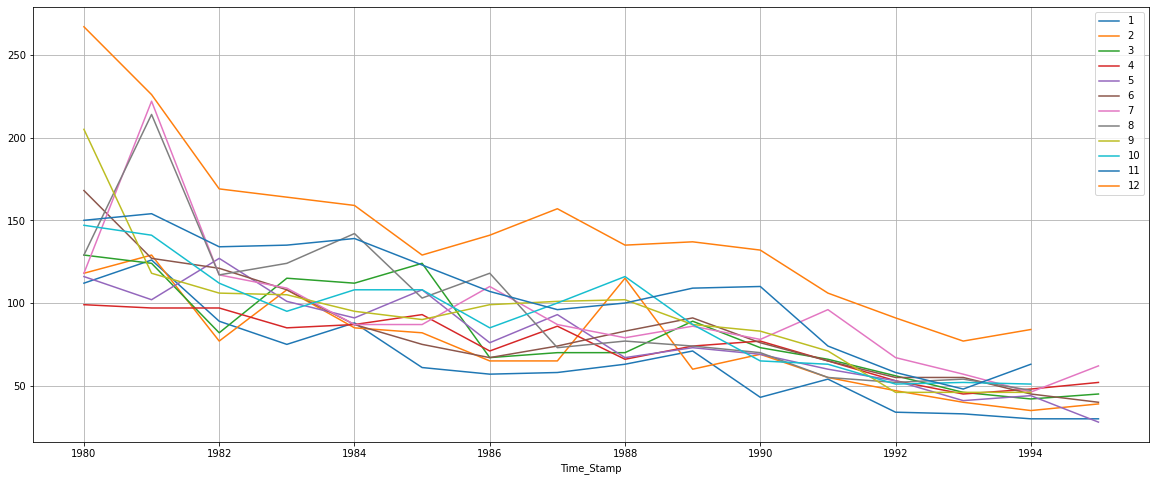

In [ ]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

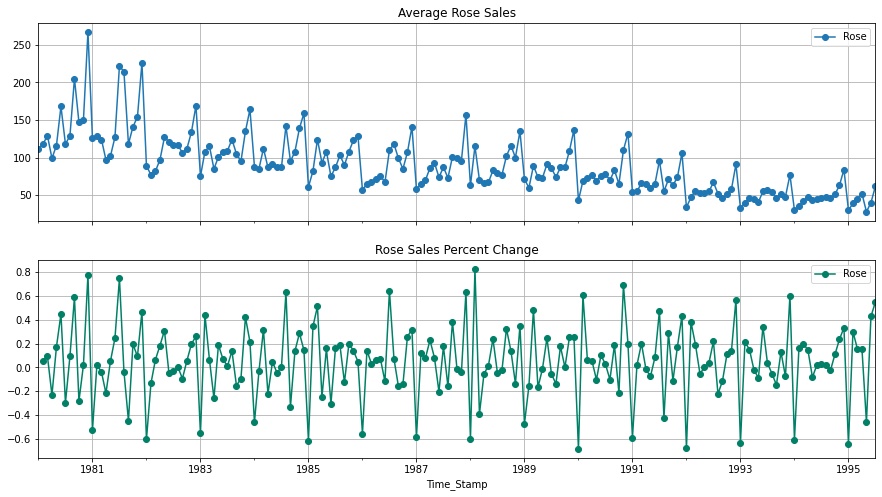

In [ ]:
# group by date and get average Rose, and precent change
average    = df_1.groupby(df_1.index)["Rose"].mean()
pct_change = df_1.groupby(df_1.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average Rose over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Rose Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for Rose over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Rose Sales Percent Change",grid=True)

In [ ]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

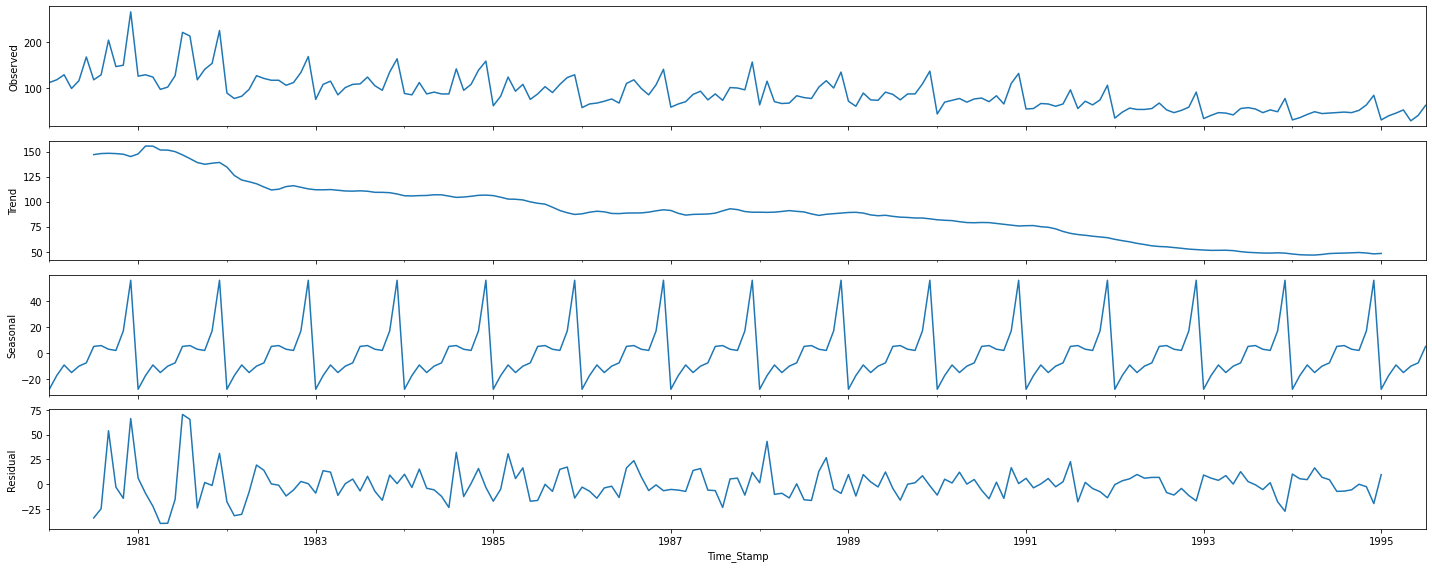

In [ ]:
decomposition = seasonal_decompose(df_1['Rose'],model='additive')
decomposition.plot();

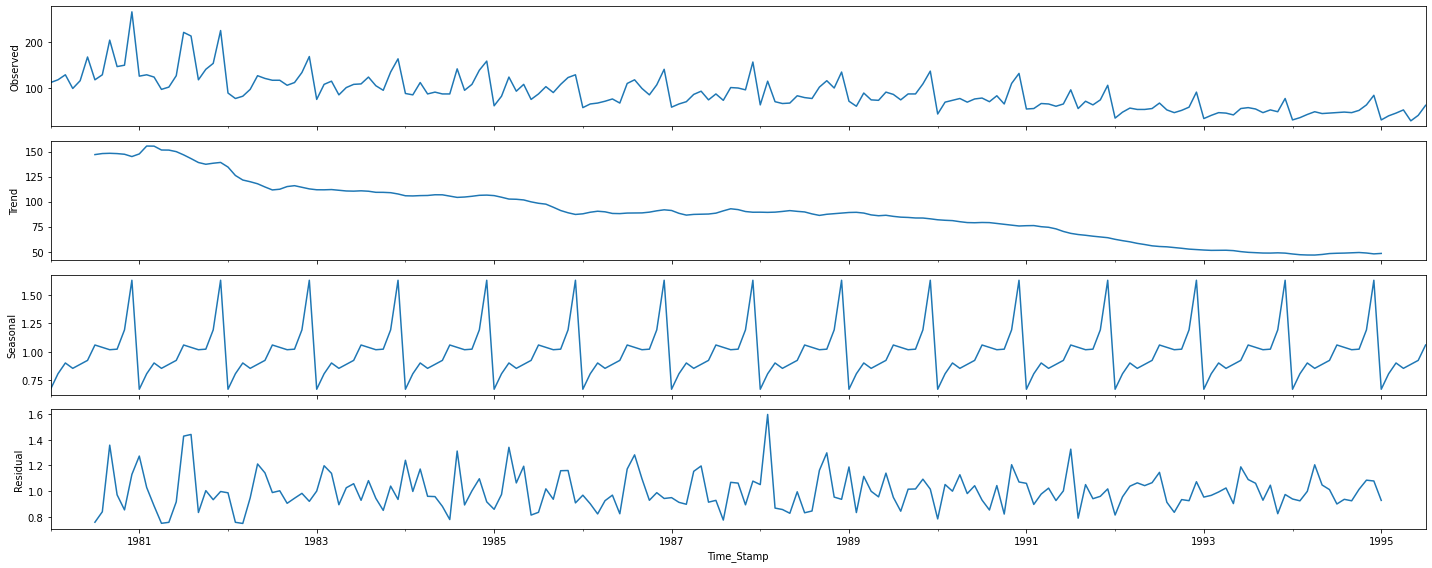

In [ ]:
decomposition_m = seasonal_decompose(df_1['Rose'],model='multiplicative')
decomposition_m.plot();

In [ ]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: Rose, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31   -27.921848
1980-02-29   -17.445147
1980-03-31    -9.299974
1980-04-30   -15.112474
1980-05-31   -10.210688
1980-06-30    -7.692831
1980-07-31     4.938518
1980-08-31     5.590168
1980-09-30     2.761485
1980-10-31     1.858708
1980-11-30    16.833708
1980-12-31    55.700374
Name: Rose, dtype: float64 

Residual 
 Time_Stamp
1980-01-31          NaN
1980-02-29          NaN
1980-03-31          NaN
1980-04-30          NaN
1980-05-31          NaN
1980-06-30          NaN
1980-07-31   -34.021852
1980-08-31   -24.715168
1980-09-30    53.863515
1980-10-31    -2.942041
1980-11-30   -14.250374
1980-12-31    66.174626


In [ ]:
train    =   df_1[0:int(len(df_1)*0.71)] 
test     =   df_1[int(len(df_1)*0.71):]

In [ ]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [ ]:
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

First few rows of Training Data 
              Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0 

Last few rows of Training Data 
              Rose
Time_Stamp       
1990-08-31   70.0
1990-09-30   83.0
1990-10-31   65.0
1990-11-30  110.0
1990-12-31  132.0 

First few rows of Test Data 
             Rose
Time_Stamp      
1991-01-31  54.0
1991-02-28  55.0
1991-03-31  66.0
1991-04-30  65.0
1991-05-31  60.0 

Last few rows of Test Data 
             Rose
Time_Stamp      
1995-03-31  45.0
1995-04-30  52.0
1995-05-31  28.0
1995-06-30  40.0
1995-07-31  62.0 



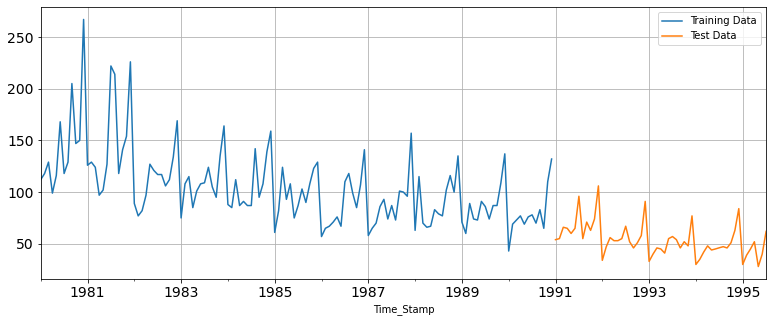

In [ ]:
train['Rose'].plot(figsize=(13,5), fontsize=14)
test['Rose'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

Model 1: Linear Regression

In [ ]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+43 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


In [ ]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [ ]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
Time_Stamp             
1980-01-31  112.0     1
1980-02-29  118.0     2
1980-03-31  129.0     3
1980-04-30   99.0     4
1980-05-31  116.0     5 

Last few rows of Training Data 
              Rose  time
Time_Stamp             
1990-08-31   70.0   128
1990-09-30   83.0   129
1990-10-31   65.0   130
1990-11-30  110.0   131
1990-12-31  132.0   132 

First few rows of Test Data 
             Rose  time
Time_Stamp            
1991-01-31  54.0    43
1991-02-28  55.0    44
1991-03-31  66.0    45
1991-04-30  65.0    46
1991-05-31  60.0    47 

Last few rows of Test Data 
             Rose  time
Time_Stamp            
1995-03-31  45.0    93
1995-04-30  52.0    94
1995-05-31  28.0    95
1995-06-30  40.0    96
1995-07-31  62.0    97 



In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

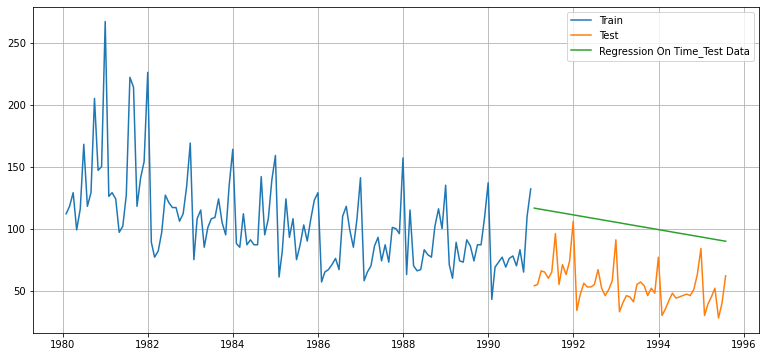

In [ ]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [ ]:
from sklearn import metrics
rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

For RegressionOnTime forecast on the Test Data,  RMSE is 51.392


Test RMSE
RegressionOnTime   51.39189

Model 2: Naive Approach

In [ ]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Name: naive, dtype: float64

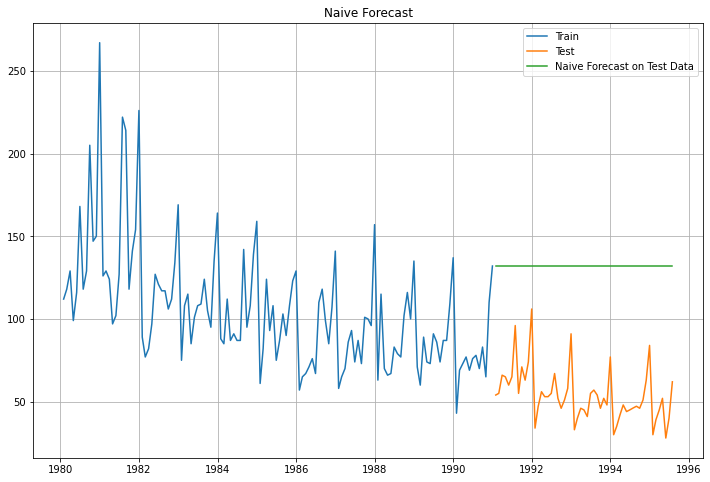

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [ ]:
rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

For RegressionOnTime forecast on the Test Data,  RMSE is 79.672


Test RMSE
RegressionOnTime  51.391890
NaiveModel        79.672238

Method 3: Simple Average

In [ ]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

Rose  mean_forecast
Time_Stamp                     
1991-01-31  54.0     104.939394
1991-02-28  55.0     104.939394
1991-03-31  66.0     104.939394
1991-04-30  65.0     104.939394
1991-05-31  60.0     104.939394

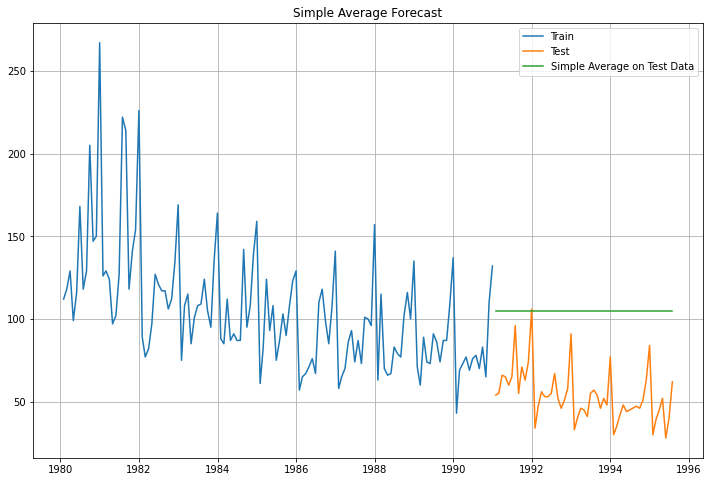

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [ ]:
rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

For Simple Average forecast on the Test Data,  RMSE is 53.413


Test RMSE
RegressionOnTime    51.391890
NaiveModel          79.672238
SimpleAverageModel  53.413057

Method 4: Moving Average(MA)

In [ ]:
MovingAverage = df_1.copy()
MovingAverage.head()


MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
Time_Stamp                                                       
1980-01-31  112.0         NaN         NaN         NaN         NaN
1980-02-29  118.0       115.0         NaN         NaN         NaN
1980-03-31  129.0       123.5         NaN         NaN         NaN
1980-04-30   99.0       114.0       114.5         NaN         NaN
1980-05-31  116.0       107.5       115.5         NaN         NaN

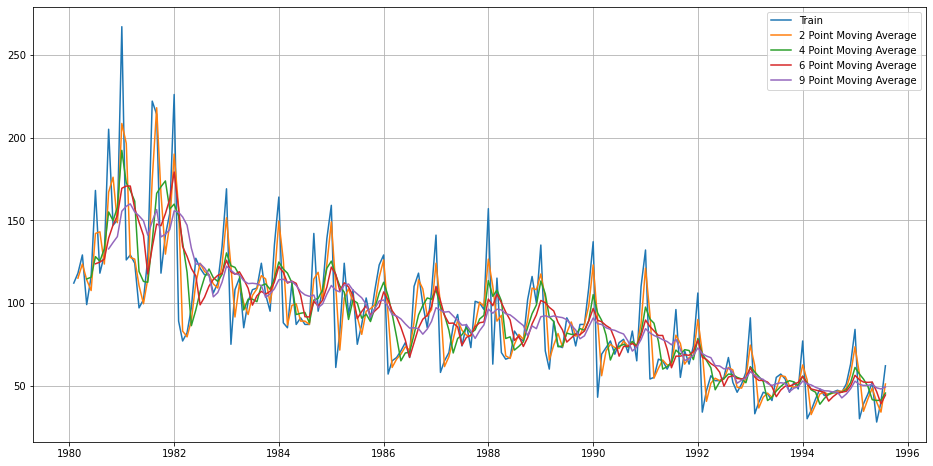

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [ ]:
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.71)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.71):]

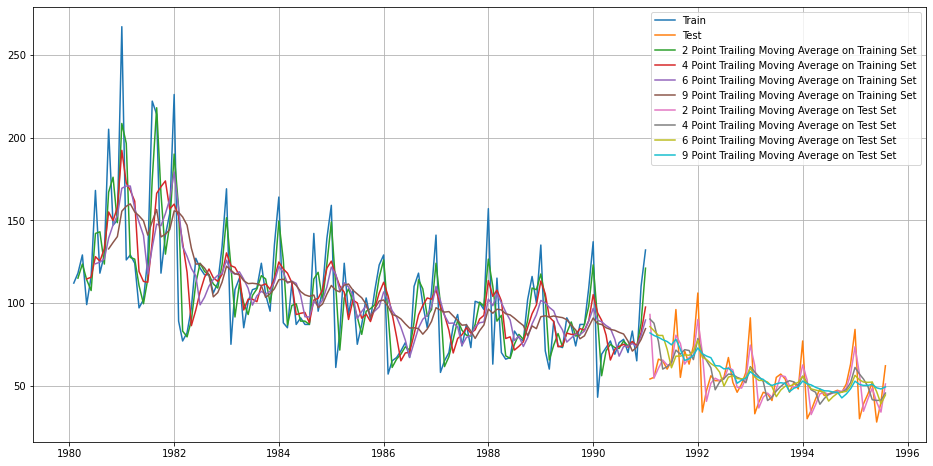

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [ ]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.530
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.444
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.555
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.721 


In [ ]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE
RegressionOnTime             51.391890
NaiveModel                   79.672238
SimpleAverageModel           53.413057
2pointTrailingMovingAverage  11.529994
4pointTrailingMovingAverage  14.444342
6pointTrailingMovingAverage  14.554944
9pointTrailingMovingAverage  14.721499

Method 5: Simple Exponential Smoothing

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [ ]:
SES_train = train.copy()
SES_test = test.copy()

model_SES = SimpleExpSmoothing(SES_train['Rose'])
model_SES_autofit = model_SES.fit(optimized=True,use_brute=True, smoothing_level=0.995)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



In [ ]:
model_SES_autofit.params


{'damping_slope': nan,
 'initial_level': 112.03012745556916,
 'initial_seasons': array([], dtype=float64),
 'initial_slope': nan,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.995,
 'smoothing_seasonal': nan,
 'smoothing_slope': nan,
 'use_boxcox': False}

In [ ]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

Rose     predict
Time_Stamp                  
1991-01-31  54.0  131.888877
1991-02-28  55.0  131.888877
1991-03-31  66.0  131.888877
1991-04-30  65.0  131.888877
1991-05-31  60.0  131.888877

In [ ]:
SES_test.tail()

Rose     predict
Time_Stamp                  
1995-03-31  45.0  131.888877
1995-04-30  52.0  131.888877
1995-05-31  28.0  131.888877
1995-06-30  40.0  131.888877
1995-07-31  62.0  131.888877

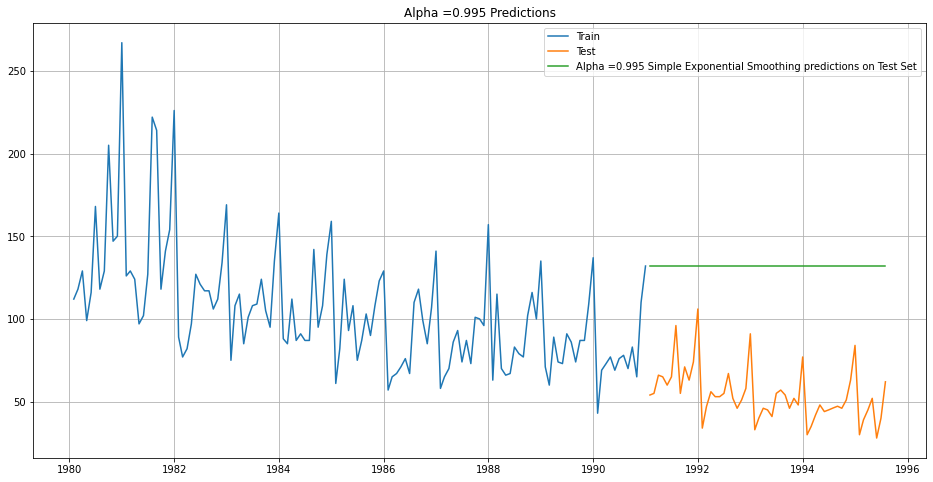

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.995 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.995 Predictions');

In [ ]:
rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
print("For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))

For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 79.563


In [ ]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.995,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE
RegressionOnTime                        51.391890
NaiveModel                              79.672238
SimpleAverageModel                      53.413057
2pointTrailingMovingAverage             11.529994
4pointTrailingMovingAverage             14.444342
6pointTrailingMovingAverage             14.554944
9pointTrailingMovingAverage             14.721499
Alpha=0.995,SimpleExponentialSmoothing  79.563308

In [ ]:
resultsDf_model = pd.DataFrame({'Alpha Values':[],'Test RMSE': []})
resultsDf_model

Empty DataFrame
Columns: [Alpha Values, Test RMSE]
Index: []

In [ ]:
for i in np.arange(0.01,1,0.01):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(test))
    
    rmse_model2_test_i = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict',i],squared=False)
    
    resultsDf_model = resultsDf_model.append({'Alpha Values':i
                                              ,'Test RMSE':rmse_model2_test_i}, ignore_index=True)

In [ ]:
resultsDf_model

Alpha Values  Test RMSE
0           0.01  50.558926
1           0.02  43.658973
2           0.03  39.853191
3           0.04  37.913591
4           0.05  36.963369
..           ...        ...
94          0.95  78.486124
95          0.96  78.740320
96          0.97  78.986129
97          0.98  79.223454
98          0.99  79.452192

[99 rows x 2 columns]

In [ ]:
resultsDf_model.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values  Test RMSE
6           0.07  36.387689
7           0.08  36.414882
5           0.06  36.532387
8           0.09  36.556036
9           0.10  36.779952
..           ...        ...
94          0.95  78.486124
95          0.96  78.740320
96          0.97  78.986129
97          0.98  79.223454
98          0.99  79.452192

[99 rows x 2 columns]

In [ ]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_model.sort_values(by=['Test RMSE'],ascending=True).values[0][1]]}
                           ,index=['Alpha=0.07,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

Test RMSE
RegressionOnTime                        51.391890
NaiveModel                              79.672238
SimpleAverageModel                      53.413057
2pointTrailingMovingAverage             11.529994
4pointTrailingMovingAverage             14.444342
6pointTrailingMovingAverage             14.554944
9pointTrailingMovingAverage             14.721499
Alpha=0.995,SimpleExponentialSmoothing  79.563308
Alpha=0.07,SimpleExponentialSmoothing   36.387689

In [ ]:
model_SES_autofit_2 = model_SES.fit(optimized=True,use_brute=True, smoothing_level=0.07)
SES_test['predict2'] = model_SES_autofit_2.forecast(steps=len(test))
SES_test.head()

Rose     predict  ...  (predict, 0.99)   predict2
Time_Stamp                    ...                            
1991-01-31  54.0  131.888877  ...       131.775518  86.707166
1991-02-28  55.0  131.888877  ...       131.775518  86.707166
1991-03-31  66.0  131.888877  ...       131.775518  86.707166
1991-04-30  65.0  131.888877  ...       131.775518  86.707166
1991-05-31  60.0  131.888877  ...       131.775518  86.707166

[5 rows x 102 columns]

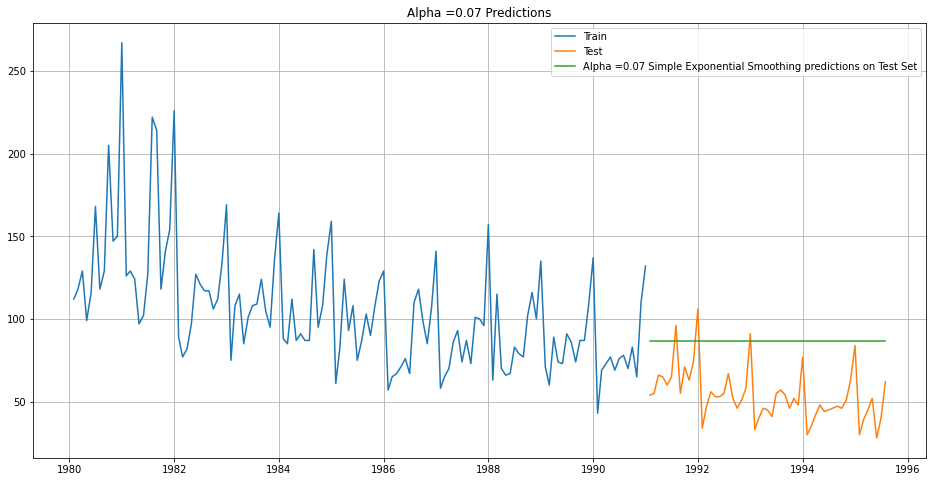

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict2'], label='Alpha =0.07 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.07 Predictions');

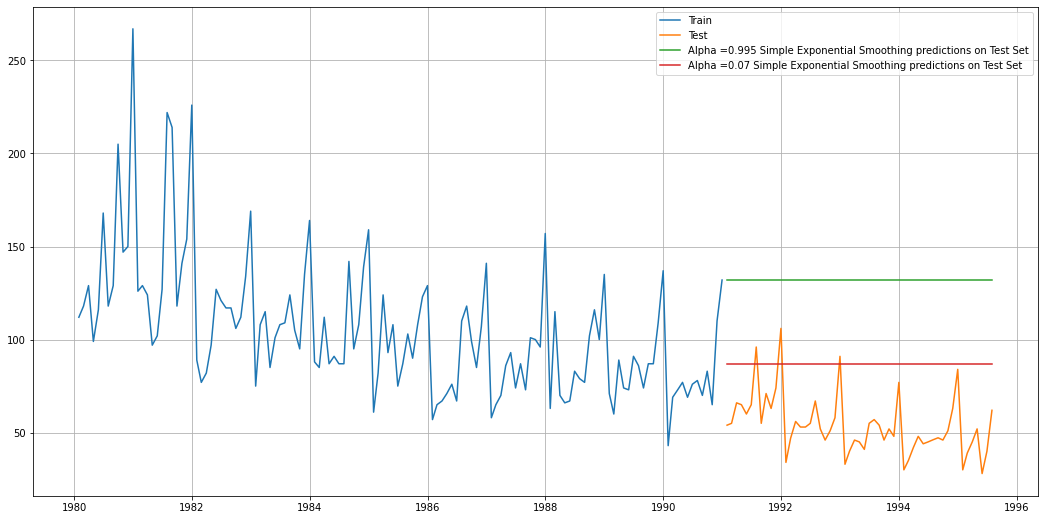

In [ ]:
plt.figure(figsize=(18,9))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.995 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict2'], label='Alpha =0.07 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

Method 6: Double Exponential Smoothing (Holt's Model)

In [ ]:
DES_train = train.copy()
DES_test = test.copy()

In [ ]:
model_DES = Holt(DES_train['Rose'])

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Test RMSE': []})
resultsDf_7

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



Empty DataFrame
Columns: [Alpha Values, Beta Values, Test RMSE]
Index: []

In [ ]:
for i in np.arange(0.01,1,0.01):
    for j in np.arange(0.01,1,0.01):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test))
        
        
        rmse_model4_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j
                                          ,'Test RMSE':rmse_model4_test}, ignore_index=True)

In [ ]:
resultsDf_7

Alpha Values  Beta Values   Test RMSE
0             0.01         0.01  450.203110
1             0.01         0.02  282.113960
2             0.01         0.03  151.801215
3             0.01         0.04   62.067778
4             0.01         0.05   57.477402
...            ...          ...         ...
9796          0.99         0.95  835.081606
9797          0.99         0.96  830.221982
9798          0.99         0.97  824.999390
9799          0.99         0.98  819.408890
9800          0.99         0.99  813.445407

[9801 rows x 3 columns]

In [ ]:
resultsDf_7.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values  Beta Values    Test RMSE
343           0.04         0.47    14.549872
222           0.03         0.25    14.676858
262           0.03         0.65    14.709867
300           0.04         0.04    14.907040
342           0.04         0.46    14.919564
...            ...          ...          ...
6731          0.68         0.99  1118.270592
7127          0.72         0.99  1118.406074
6830          0.69         0.99  1119.037675
7028          0.71         0.99  1119.121221
6929          0.70         0.99  1119.325804

[9801 rows x 3 columns]

In [ ]:
model_DES = Holt(DES_train['Rose'])
model_DES_autofit = model_DES.fit(optimized=True,use_brute=True, smoothing_level=0.04, smoothing_slope=0.47)
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test))
DES_test.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



Rose  (predict, 0.01, 0.01)  ...  (predict, 0.99, 0.99)    predict
Time_Stamp                               ...                                  
1991-01-31  54.0             426.052834  ...             155.242193  66.965127
1991-02-28  55.0             428.829929  ...             178.275917  66.558767
1991-03-31  66.0             431.607024  ...             201.309642  66.152406
1991-04-30  65.0             434.384119  ...             224.343367  65.746045
1991-05-31  60.0             437.161214  ...             247.377091  65.339685

[5 rows x 9803 columns]

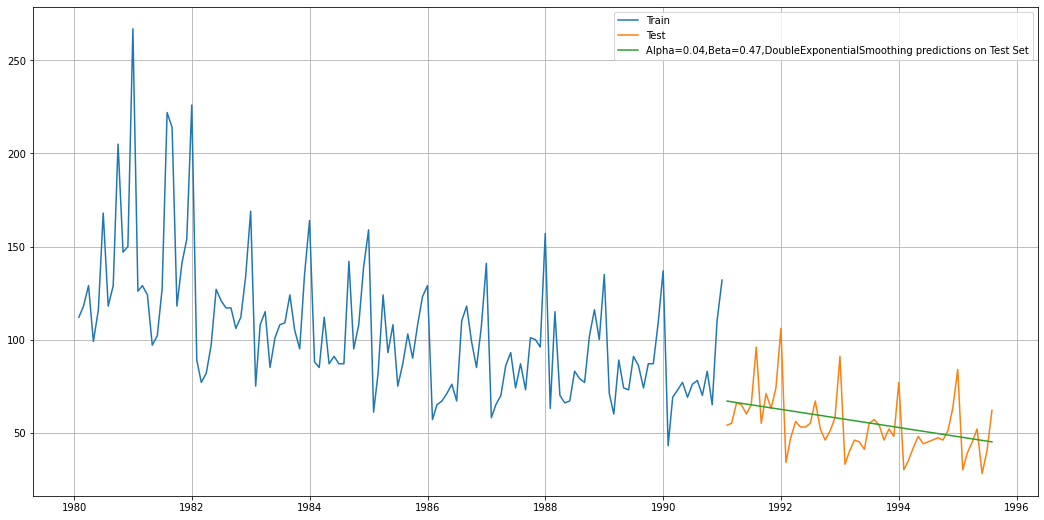

In [ ]:
plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_test['predict'], label='Alpha=0.04,Beta=0.47,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [ ]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][2]]}
                           ,index=['Alpha=0.04,Beta=0.47,DoubleExponentialSmoothing'])
resultsDf_7_1

Test RMSE
Alpha=0.04,Beta=0.47,DoubleExponentialSmoothing  14.549872

In [ ]:
resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

Test RMSE
RegressionOnTime                                 51.391890
NaiveModel                                       79.672238
SimpleAverageModel                               53.413057
2pointTrailingMovingAverage                      11.529994
4pointTrailingMovingAverage                      14.444342
6pointTrailingMovingAverage                      14.554944
9pointTrailingMovingAverage                      14.721499
Alpha=0.995,SimpleExponentialSmoothing           79.563308
Alpha=0.07,SimpleExponentialSmoothing            36.387689
Alpha=0.04,Beta=0.47,DoubleExponentialSmoothing  14.549872

Method 7: Triple Exponential Smoothing (Holt - Winter's Model)

In [ ]:
TES_train = train.copy()
TES_test = test.copy()

In [ ]:
model_TES = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='additive',freq='M')

In [ ]:
model_TES_autofit = model_TES.fit()

In [ ]:
model_TES_autofit.params

{'damping_slope': nan,
 'initial_level': 76.40262381194242,
 'initial_seasons': array([ 38.68624225,  51.02099115,  58.99256853,  48.32902411,
         57.12003189,  62.54839839,  72.43366307,  78.50129011,
         74.47816209,  72.54576094,  90.61515859, 132.86758386]),
 'initial_slope': 0.0,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.13346990008678222,
 'smoothing_seasonal': 0.0,
 'smoothing_slope': 0.013793634338389796,
 'use_boxcox': False}

In [ ]:
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

Rose  auto_predict
Time_Stamp                    
1991-01-31  54.0     44.130344
1991-02-28  55.0     56.069626
1991-03-31  66.0     63.645737
1991-04-30  65.0     52.586727
1991-05-31  60.0     60.982268

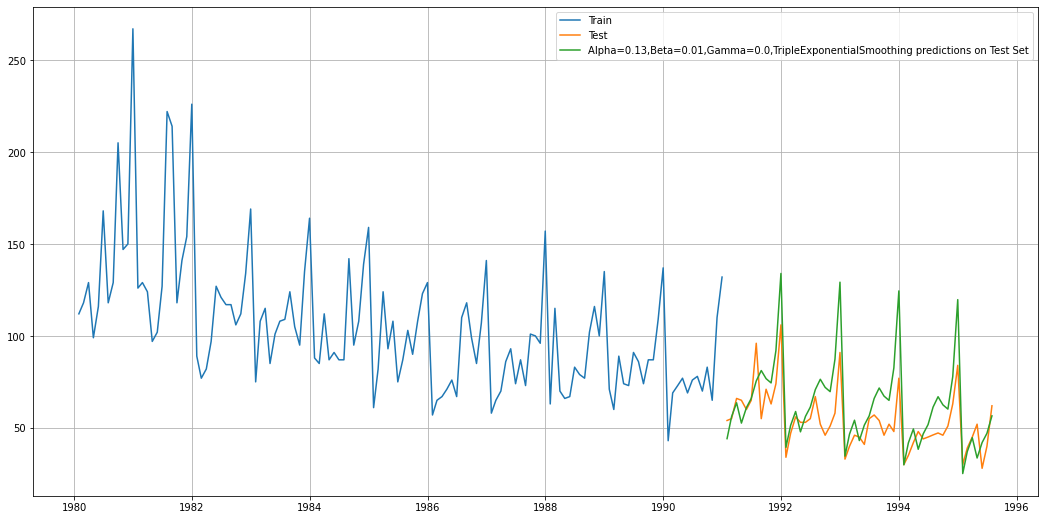

In [ ]:
plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.13,Beta=0.01,Gamma=0.0,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [ ]:
rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Rose'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.13,Beta=0.01,Gamma=0.0, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.13,Beta=0.01,Gamma=0.0, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 16.396


In [ ]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.13,Beta=0.01,Gamma=0.0,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

Test RMSE
RegressionOnTime                                    51.391890
NaiveModel                                          79.672238
SimpleAverageModel                                  53.413057
2pointTrailingMovingAverage                         11.529994
4pointTrailingMovingAverage                         14.444342
6pointTrailingMovingAverage                         14.554944
9pointTrailingMovingAverage                         14.721499
Alpha=0.995,SimpleExponentialSmoothing              79.563308
Alpha=0.07,SimpleExponentialSmoothing               36.387689
Alpha=0.04,Beta=0.47,DoubleExponentialSmoothing     14.549872
Alpha=0.13,Beta=0.01,Gamma=0.0,TripleExponentia...  16.396129

In [ ]:
resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Test RMSE': []})
resultsDf_8_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Test RMSE]
Index: []

In [ ]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
                
            rmse_model6_test_2 = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',i,j,k],squared=False)
                    
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k
                                                  ,'Test RMSE':rmse_model6_test_2}, ignore_index=True)

In [ ]:
resultsDf_8_2.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values  Beta Values  Gamma Values      Test RMSE
32            0.1          0.4           0.3      12.090531
13            0.1          0.2           0.4      12.111554
22            0.1          0.3           0.3      12.156303
12            0.1          0.2           0.3      12.223045
23            0.1          0.3           0.4      12.243495
..            ...          ...           ...            ...
999           1.0          1.0           1.0  279926.495700
899           0.9          1.0           1.0  320629.189119
998           1.0          1.0           0.9  321026.648794
979           1.0          0.8           1.0  337174.802909
989           1.0          0.9           1.0  438941.956045

[1000 rows x 4 columns]

In [ ]:
model_TES = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='additive',freq='M')
model_TES_autofit = model_TES.fit(optimized=True,use_brute=True, smoothing_level=0.1, smoothing_slope=0.4, smoothing_seasonal=0.3)
TES_test['predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

Rose  auto_predict  ...  (predict, 1.0, 1.0, 1.0)    predict
Time_Stamp                      ...                                     
1991-01-31  54.0     44.130344  ...              38635.333333  44.780733
1991-02-28  55.0     56.069626  ...              34555.000000  61.126397
1991-03-31  66.0     63.645737  ...             -24902.000000  65.619158
1991-04-30  65.0     52.586727  ...             -92485.666667  60.611733
1991-05-31  60.0     60.982268  ...             372535.000000  60.191184

[5 rows x 1003 columns]

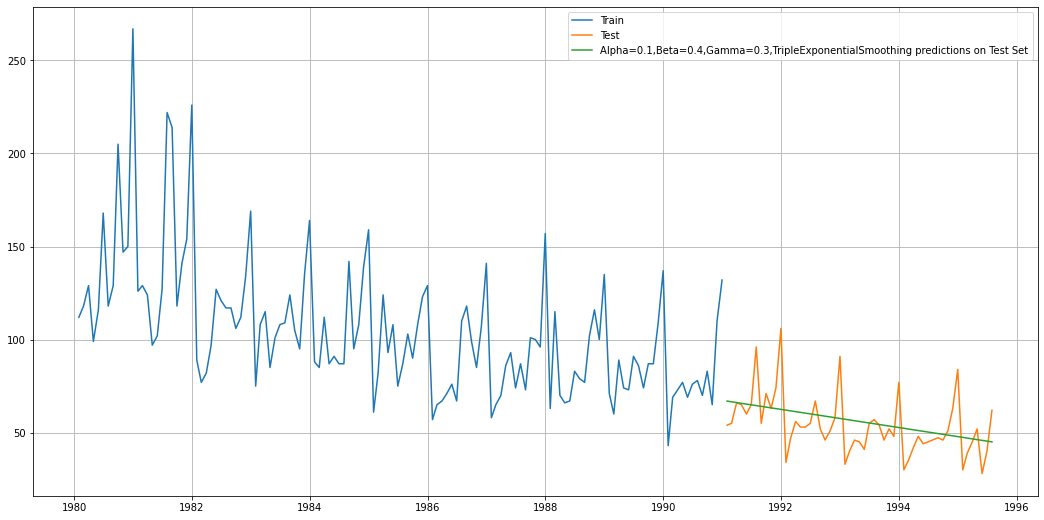

In [ ]:
plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_test['predict'], label='Alpha=0.1,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [ ]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.1,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing'])

resultsDf_8_3

Test RMSE
Alpha=0.1,Beta=0.4,Gamma=0.3,TripleExponentialS...  12.090531

In [ ]:
resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

Test RMSE
RegressionOnTime                                    51.391890
NaiveModel                                          79.672238
SimpleAverageModel                                  53.413057
2pointTrailingMovingAverage                         11.529994
4pointTrailingMovingAverage                         14.444342
6pointTrailingMovingAverage                         14.554944
9pointTrailingMovingAverage                         14.721499
Alpha=0.995,SimpleExponentialSmoothing              79.563308
Alpha=0.07,SimpleExponentialSmoothing               36.387689
Alpha=0.04,Beta=0.47,DoubleExponentialSmoothing     14.549872
Alpha=0.13,Beta=0.01,Gamma=0.0,TripleExponentia...  16.396129
Alpha=0.1,Beta=0.4,Gamma=0.3,TripleExponentialS...  12.090531

In [ ]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
2pointTrailingMovingAverage                         11.529994
Alpha=0.1,Beta=0.4,Gamma=0.3,TripleExponentialS...  12.090531
4pointTrailingMovingAverage                         14.444342
Alpha=0.04,Beta=0.47,DoubleExponentialSmoothing     14.549872
6pointTrailingMovingAverage                         14.554944
9pointTrailingMovingAverage                         14.721499
Alpha=0.13,Beta=0.01,Gamma=0.0,TripleExponentia...  16.396129
Alpha=0.07,SimpleExponentialSmoothing               36.387689
RegressionOnTime                                    51.391890
SimpleAverageModel                                  53.413057
Alpha=0.995,SimpleExponentialSmoothing              79.563308
NaiveModel                                          79.672238

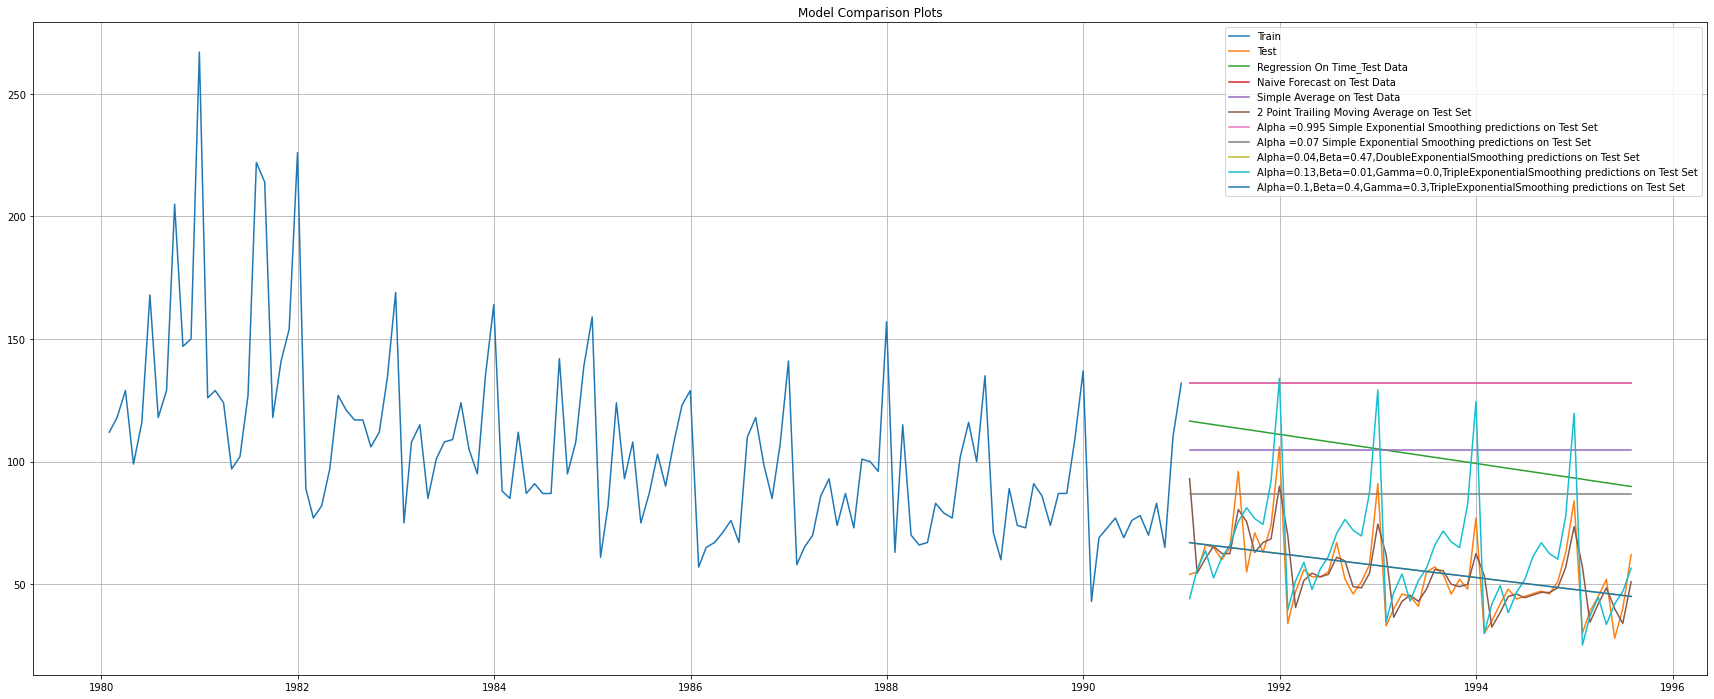

In [ ]:
plt.figure(figsize=(30,12))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')

plt.plot(SES_test['predict'], label='Alpha =0.995 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict2'], label='Alpha =0.07 Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_test['predict'], label='Alpha=0.04,Beta=0.47,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(TES_test['auto_predict'], label='Alpha=0.13,Beta=0.01,Gamma=0.0,TripleExponentialSmoothing predictions on Test Set')

plt.plot(DES_test['predict'], label='Alpha=0.1,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

Check for stationarity of the series at  α  = 0.05 using appropriate statistical tests.

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

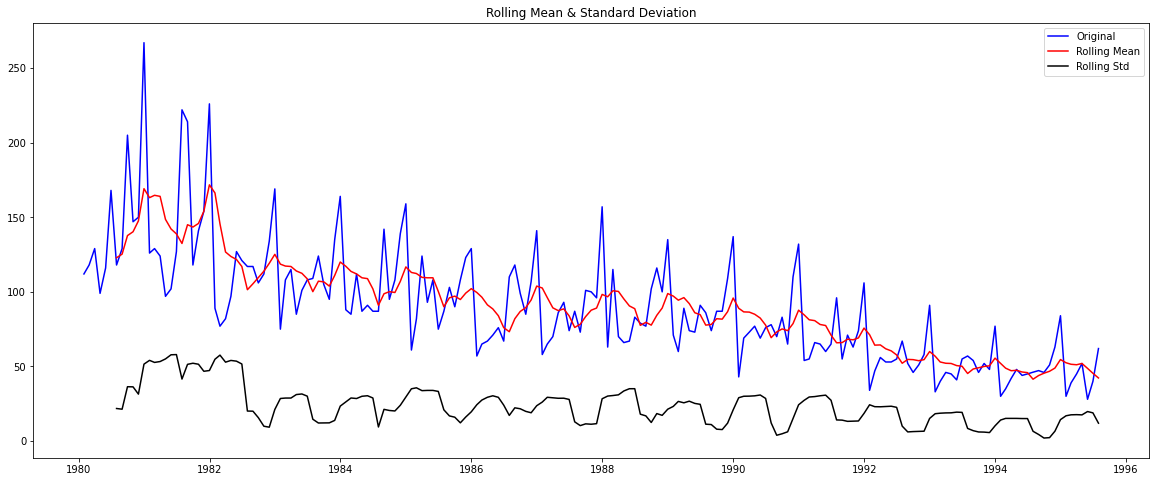

Results of Dickey-Fuller Test:
Test Statistic                  -1.880931
p-value                          0.341084
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [ ]:
test_stationarity(df_1['Rose'])

We see that at 5% significant level the Time Series is non-stationary.

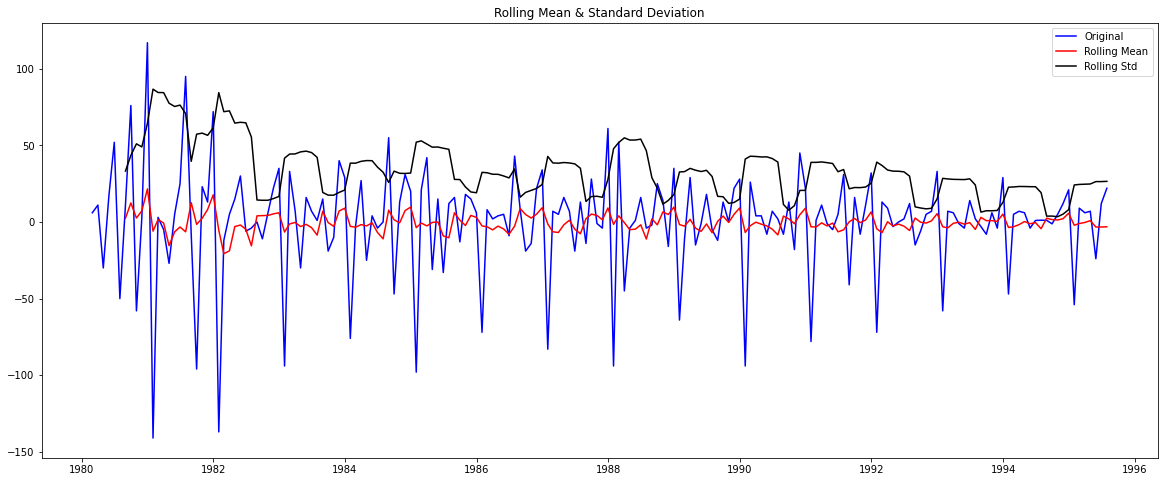

Results of Dickey-Fuller Test:
Test Statistic                -8.044820e+00
p-value                        1.806363e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [ ]:
test_stationarity(df_1['Rose'].diff().dropna())

After taking a difference of order 1, we see that at  α  = 0.05 the Time Series is indeed stationary.

In [ ]:
train=df_1[df_1.index.year < 1991]
test=df_1[df_1.index.year >= 1991]

from IPython.display import display

print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

Last few rows of Training Data


Rose
Time_Stamp       
1990-08-31   70.0
1990-09-30   83.0
1990-10-31   65.0
1990-11-30  110.0
1990-12-31  132.0

First few rows of Test Data


Rose
Time_Stamp      
1991-01-31  54.0
1991-02-28  55.0
1991-03-31  66.0
1991-04-30  65.0
1991-05-31  60.0

Last few rows of Test Data


Rose
Time_Stamp      
1995-03-31  45.0
1995-04-30  52.0
1995-05-31  28.0
1995-06-30  40.0
1995-07-31  62.0

In [ ]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


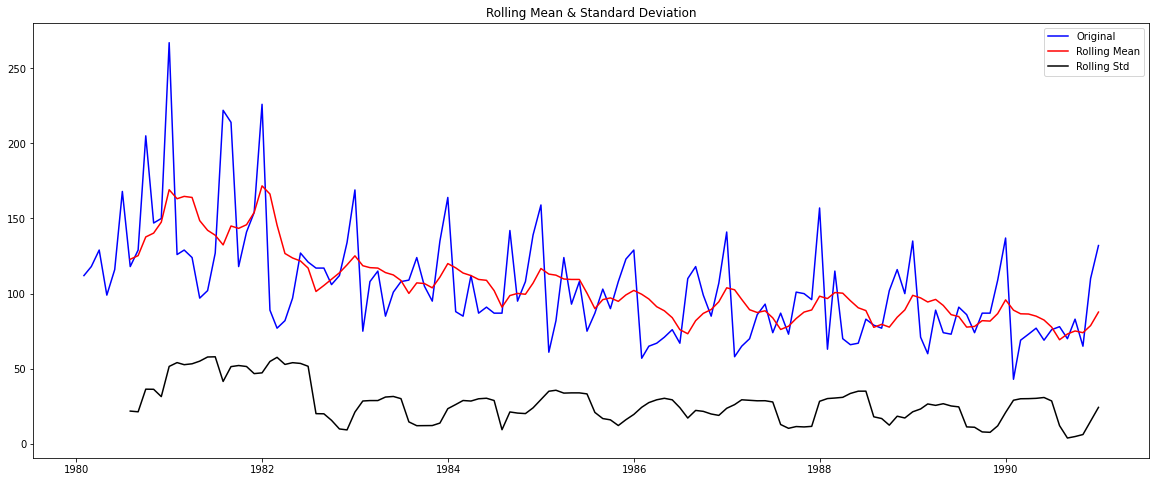

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [ ]:
test_stationarity(train['Rose'])

We see that the series is not stationary at  α  = 0.05

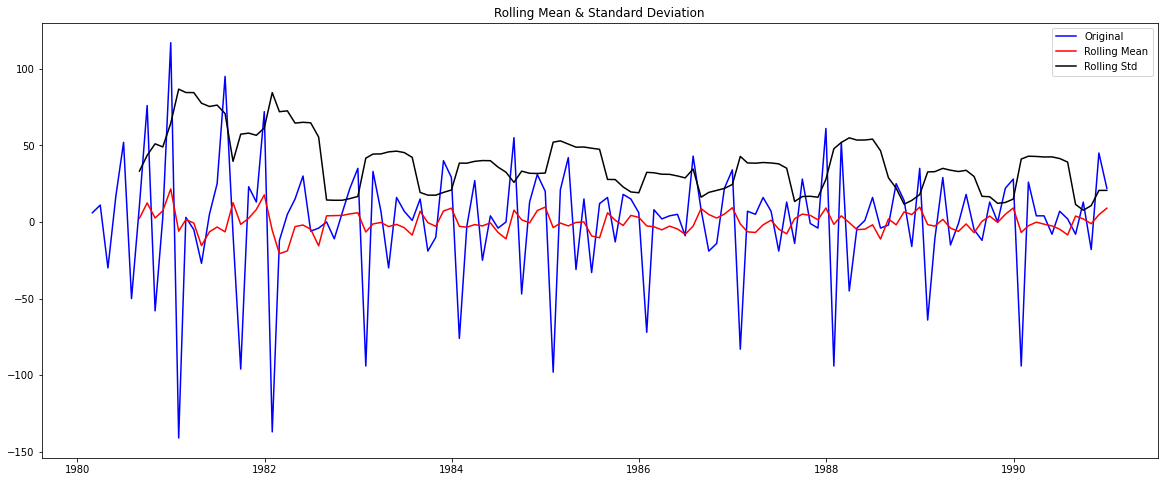

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [ ]:
test_stationarity(train['Rose'].diff().dropna())

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-31 to 1990-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    132 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


Method 7: ARIMA Model

In [ ]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [ ]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1335.1526583086775
ARIMA(0, 1, 1) - AIC:1280.726183046564
ARIMA(0, 1, 2) - AIC:1276.8353739697154
ARIMA(1, 1, 0) - AIC:1319.3483105801952
ARIMA(1, 1, 1) - AIC:1277.775753537875
ARIMA(1, 1, 2) - AIC:1277.3592237463395
ARIMA(2, 1, 0) - AIC:1300.6092611744334
ARIMA(2, 1, 1) - AIC:1279.0456894093122
ARIMA(2, 1, 2) - AIC:1279.2986939365192


In [ ]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
2  (0, 1, 2)  1276.835374
5  (1, 1, 2)  1277.359224
4  (1, 1, 1)  1277.775754
7  (2, 1, 1)  1279.045689
8  (2, 1, 2)  1279.298694
1  (0, 1, 1)  1280.726183
6  (2, 1, 0)  1300.609261
3  (1, 1, 0)  1319.348311
0  (0, 1, 0)  1335.152658

In [ ]:
auto_ARIMA = ARIMA(train['Rose'], order=(0,1,2),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -634.418
Method:                       css-mle   S.D. of innovations             30.167
Date:                Sat, 07 Nov 2020   AIC                           1276.835
Time:                        22:33:54   BIC                           1288.336
Sample:                    02-29-1980   HQIC                          1281.509
                         - 12-31-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4885      0.085     -5.742      0.000      -0.655      -0.322
ma.L1.D.Rose    -0.7601      0.101     -7.499      0.000      -0.959      -0.561
ma.L2.D.Rose    -0.2398      0.095     -2.51

In [ ]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [ ]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA[0],squared=False)
print(rmse)


15.60471570363128


In [ ]:
resultsDf_8_4 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(0,1,2)_AIC'])

resultsDf_8_4

Test RMSE
ARIMA(0,1,2)_AIC  15.604716

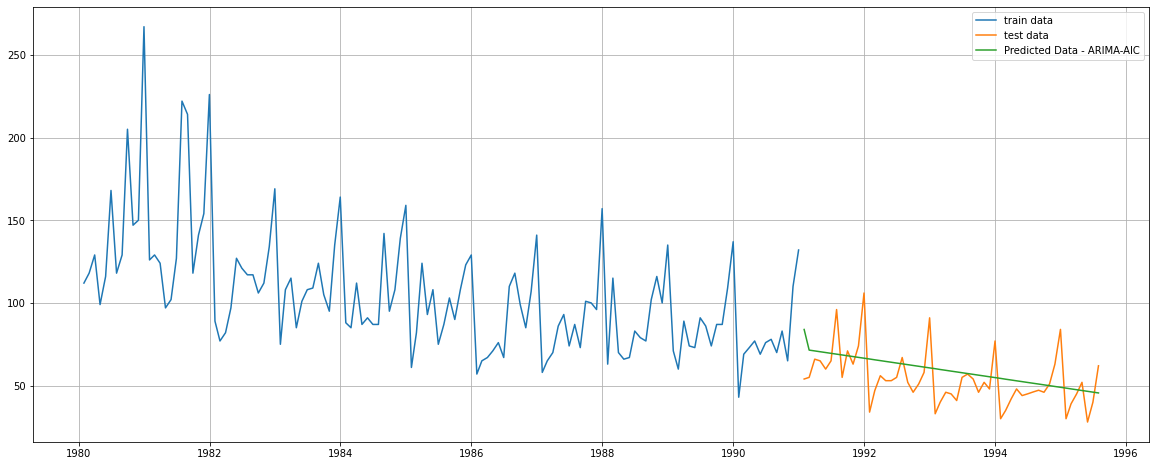

In [ ]:
plt.plot(train,label='train data')
plt.plot(test,label='test data')
plt.plot(test.index,predicted_auto_ARIMA[0],label='Predicted Data - ARIMA-AIC')
plt.legend(loc='best')
plt.grid();

In [ ]:
resultsDf = pd.concat([resultsDf, resultsDf_8_4])
resultsDf

Test RMSE
RegressionOnTime                                    51.391890
NaiveModel                                          79.672238
SimpleAverageModel                                  53.413057
2pointTrailingMovingAverage                         11.529994
4pointTrailingMovingAverage                         14.444342
6pointTrailingMovingAverage                         14.554944
9pointTrailingMovingAverage                         14.721499
Alpha=0.995,SimpleExponentialSmoothing              79.563308
Alpha=0.07,SimpleExponentialSmoothing               36.387689
Alpha=0.04,Beta=0.47,DoubleExponentialSmoothing     14.549872
Alpha=0.13,Beta=0.01,Gamma=0.0,TripleExponentia...  16.396129
Alpha=0.1,Beta=0.4,Gamma=0.3,TripleExponentialS...  12.090531
ARIMA(0,1,2)_AIC                                    15.604716

Method 8: SARIMA Model

In [ ]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [ ]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [ ]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1264.4996261113852
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1144.7077471827347
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:1274.7897737087985
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1241.7870945149077
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1146.3093266722656
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1137.9167236212038
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1137.4533629515272
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1117.02244260151
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:1263.5369097383962
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1201.383254802956
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1097.1908217752778
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:1222.4354735745053
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:1160.4386253745392
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1084.856412384602
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1095.7490379981994
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1097.6455189059511
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1053.0044082625245
SARIMA(0, 1, 2)x(0, 0, 0, 6) - A

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMA(2, 1, 2)x(1, 0, 1, 6) - AIC:1150.7283757608457
SARIMA(2, 1, 2)x(1, 0, 2, 6) - AIC:1063.1103215380972
SARIMA(2, 1, 2)x(2, 0, 0, 6) - AIC:1073.696145782741
SARIMA(2, 1, 2)x(2, 0, 1, 6) - AIC:1070.0771798953472
SARIMA(2, 1, 2)x(2, 0, 2, 6) - AIC:1045.220362306394


In [ ]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal          AIC
53  (1, 1, 2)  (2, 0, 2, 6)  1041.655819
26  (0, 1, 2)  (2, 0, 2, 6)  1043.600261
80  (2, 1, 2)  (2, 0, 2, 6)  1045.220362
71  (2, 1, 1)  (2, 0, 2, 6)  1051.673461
44  (1, 1, 1)  (2, 0, 2, 6)  1052.778470

In [ ]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 1, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA  = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA .summary())

                                 Statespace Model Results                                
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 1, 2, 6)   Log Likelihood                -472.341
Date:                           Sat, 07 Nov 2020   AIC                            960.683
Time:                                   22:34:19   BIC                            982.286
Sample:                                        0   HQIC                           969.445
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8733      0.053    -16.577      0.000      -0.977      -0.770
ma.L1          0.1204      0.157      0.765

In [ ]:
predicted_auto_SARIMA  = results_auto_SARIMA.get_forecast(steps=len(test))

In [ ]:
rmse_S = mean_squared_error(test['Rose'],predicted_auto_SARIMA.predicted_mean,squared=False)
print(rmse_S)

18.67253097863811


In [ ]:
resultsDf_8_5 = pd.DataFrame({'Test RMSE': [rmse_S]}
                           ,index=['SARIMA(1,1,2)(2,1,2,6)_AIC'])

resultsDf_8_5

Test RMSE
SARIMA(1,1,2)(2,1,2,6)_AIC  18.672531

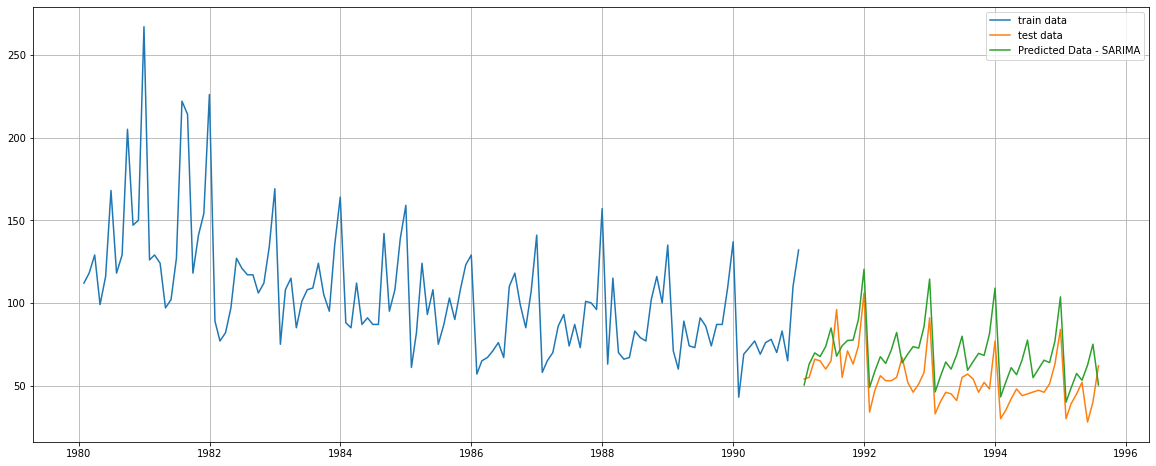

In [ ]:
plt.plot(train,label='train data')
plt.plot(test,label='test data')
plt.plot(test.index,predicted_auto_SARIMA.predicted_mean,label='Predicted Data - SARIMA')
plt.legend(loc='best')
plt.grid();

In [ ]:
resultsDf = pd.concat([resultsDf, resultsDf_8_5])
resultsDf

Test RMSE
RegressionOnTime                                    51.391890
NaiveModel                                          79.672238
SimpleAverageModel                                  53.413057
2pointTrailingMovingAverage                         11.529994
4pointTrailingMovingAverage                         14.444342
6pointTrailingMovingAverage                         14.554944
9pointTrailingMovingAverage                         14.721499
Alpha=0.995,SimpleExponentialSmoothing              79.563308
Alpha=0.07,SimpleExponentialSmoothing               36.387689
Alpha=0.04,Beta=0.47,DoubleExponentialSmoothing     14.549872
Alpha=0.13,Beta=0.01,Gamma=0.0,TripleExponentia...  16.396129
Alpha=0.1,Beta=0.4,Gamma=0.3,TripleExponentialS...  12.090531
ARIMA(0,1,2)_AIC                                    15.604716
SARIMA(1,1,2)(2,1,2,6)_AIC                          18.672531

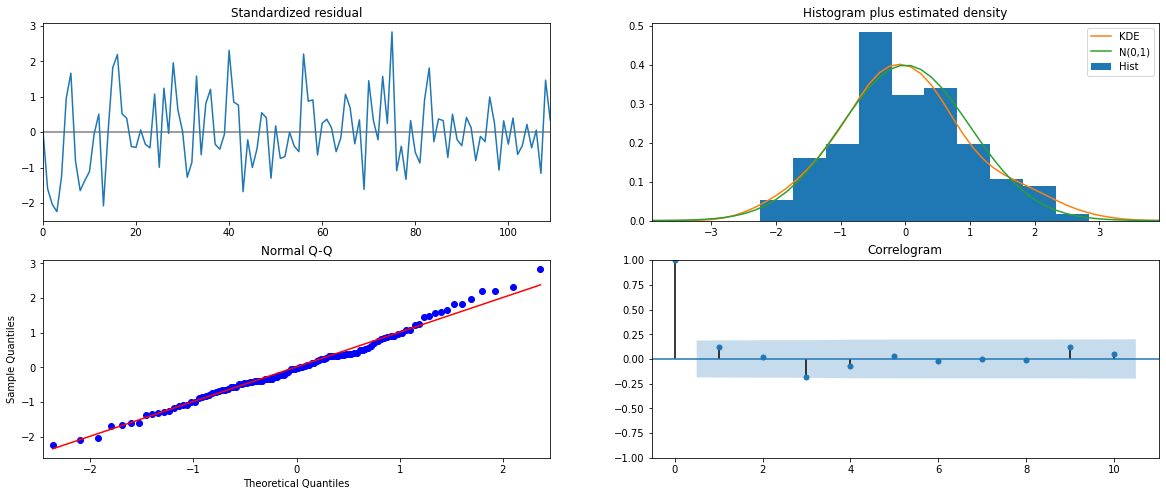

In [ ]:
results_auto_SARIMA.plot_diagnostics()
plt.show()

Method 9: ARIMA Model using cut-off points of ACF and PACF

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

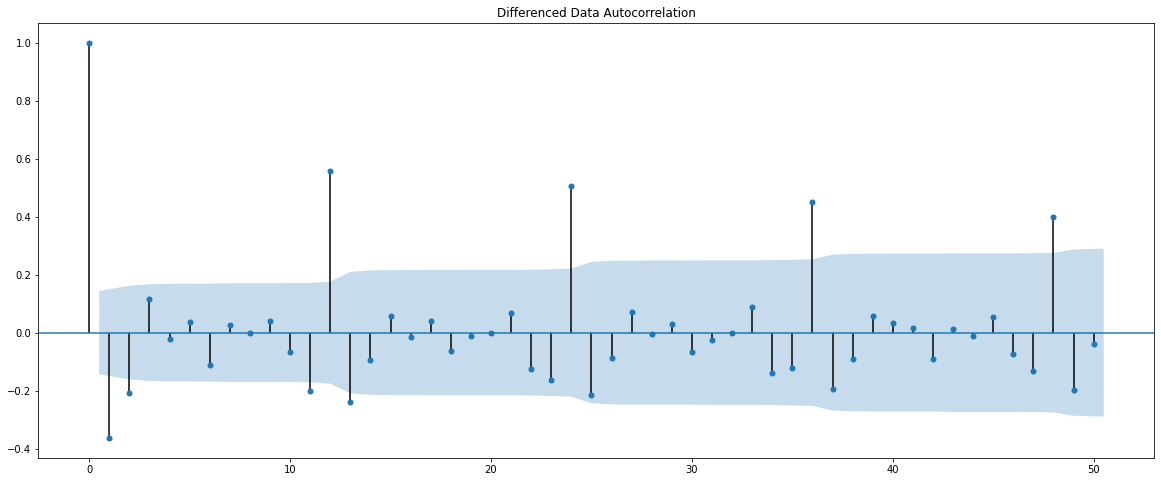

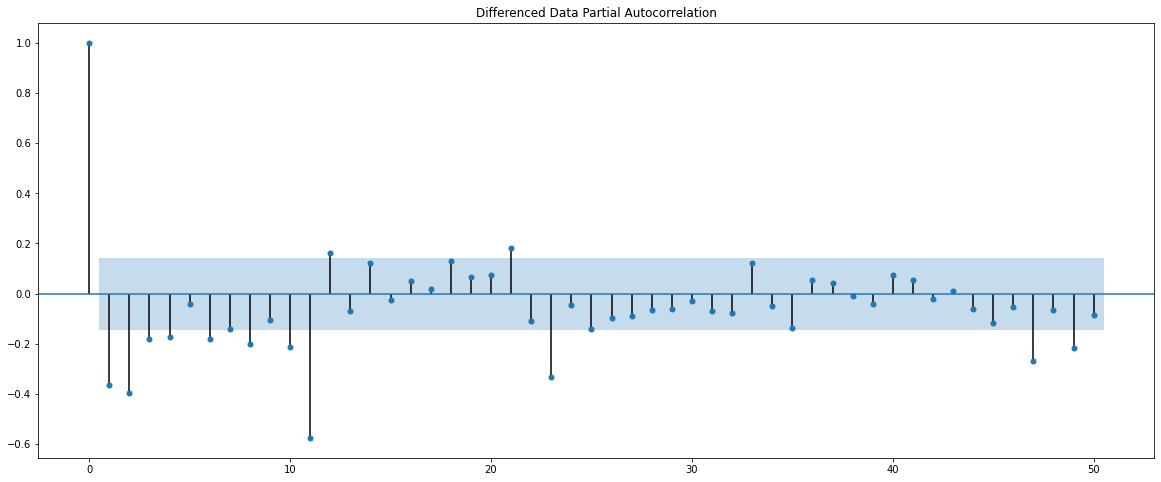

In [ ]:
plot_acf(df_1['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df_1['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [ ]:
manual_ARIMA = ARIMA(train['Rose'].astype('float64'), order=(2,1,4),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(2, 1, 4)   Log Likelihood                -633.208
Method:                       css-mle   S.D. of innovations             29.692
Date:                Sat, 07 Nov 2020   AIC                           1282.417
Time:                        22:34:21   BIC                           1305.418
Sample:                    02-29-1980   HQIC                          1291.763
                         - 12-31-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.5569      0.275     -2.028      0.045      -1.095      -0.019
ar.L1.D.Rose     0.3983      0.359      1.110      0.269      -0.305       1.102
ar.L2.D.Rose     0.4886      0.324      1.50

In [ ]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [ ]:
rmse_ma = mean_squared_error(test['Rose'],predicted_manual_ARIMA[0],squared=False)
print(rmse_ma)

22.278719722052863


In [ ]:
resultsDf_9 = pd.DataFrame({'Test RMSE': [rmse_ma]}
                           ,index=['ARIMA(2,1,4)_ACF-PACF'])

resultsDf_9

Test RMSE
ARIMA(2,1,4)_ACF-PACF   22.27872

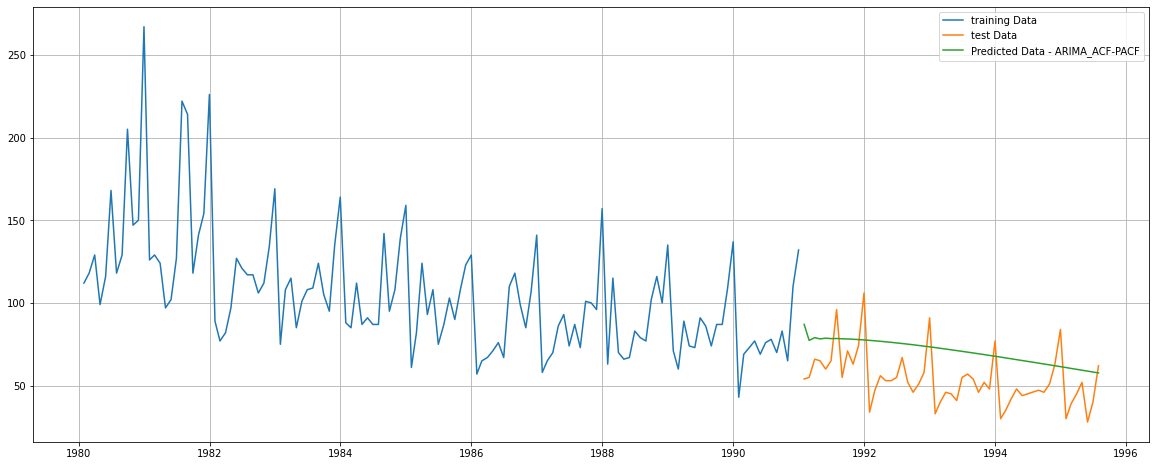

In [ ]:
plt.plot(train,label='training Data')
plt.plot(test,label='test Data')
plt.plot(test.index,predicted_manual_ARIMA[0],label='Predicted Data - ARIMA_ACF-PACF')
plt.legend(loc='best')
plt.grid();

In [ ]:
resultsDf = pd.concat([resultsDf, resultsDf_9])
resultsDf

Test RMSE
RegressionOnTime                                    51.391890
NaiveModel                                          79.672238
SimpleAverageModel                                  53.413057
2pointTrailingMovingAverage                         11.529994
4pointTrailingMovingAverage                         14.444342
6pointTrailingMovingAverage                         14.554944
9pointTrailingMovingAverage                         14.721499
Alpha=0.995,SimpleExponentialSmoothing              79.563308
Alpha=0.07,SimpleExponentialSmoothing               36.387689
Alpha=0.04,Beta=0.47,DoubleExponentialSmoothing     14.549872
Alpha=0.13,Beta=0.01,Gamma=0.0,TripleExponentia...  16.396129
Alpha=0.1,Beta=0.4,Gamma=0.3,TripleExponentialS...  12.090531
ARIMA(0,1,2)_AIC                                    15.604716
SARIMA(1,1,2)(2,1,2,6)_AIC                          18.672531
ARIMA(2,1,4)_ACF-PACF                               22.278720

Method 10: SARIMA Model using cut-off points of ACF and PACF

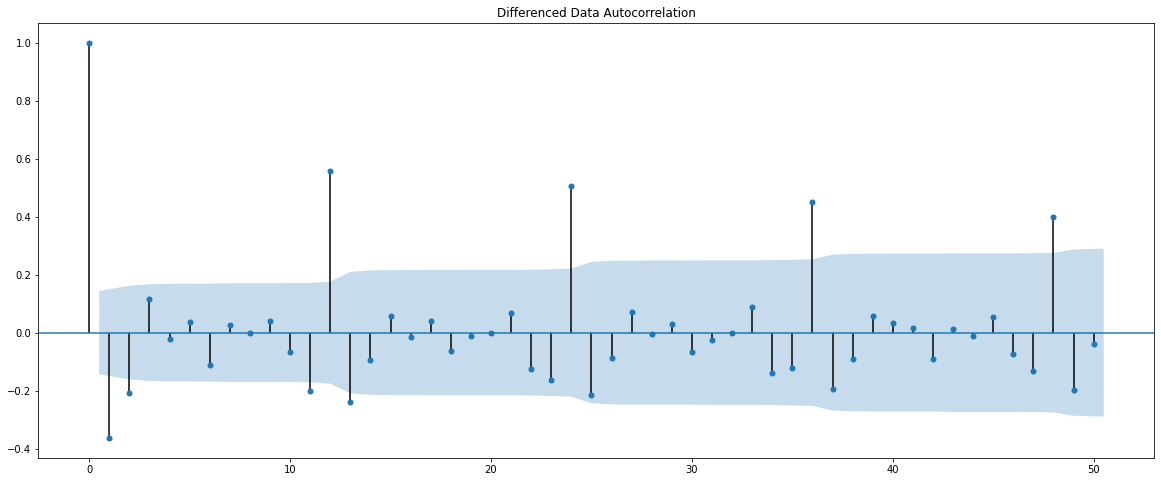

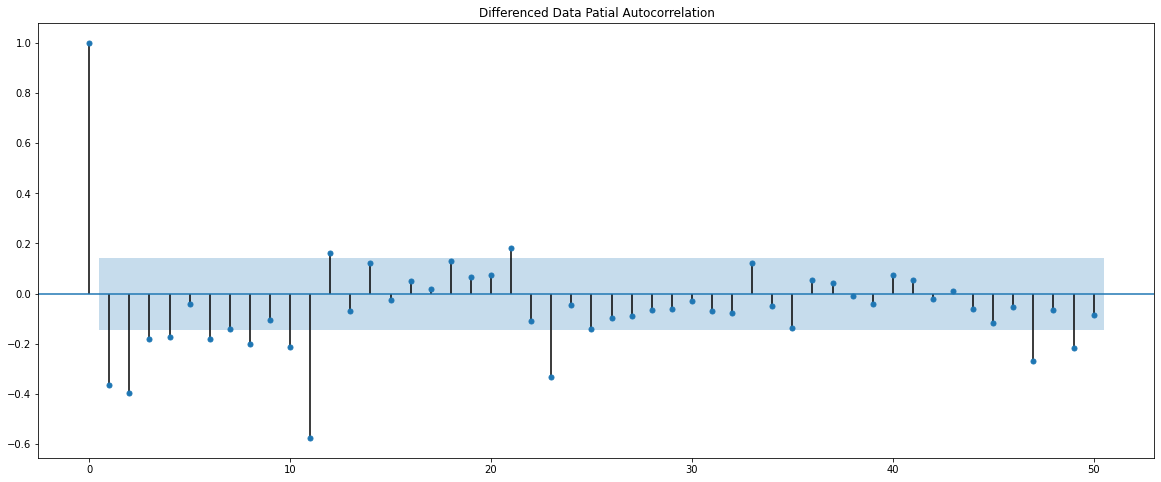

In [ ]:
plot_acf(df_1['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df_1['Rose'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

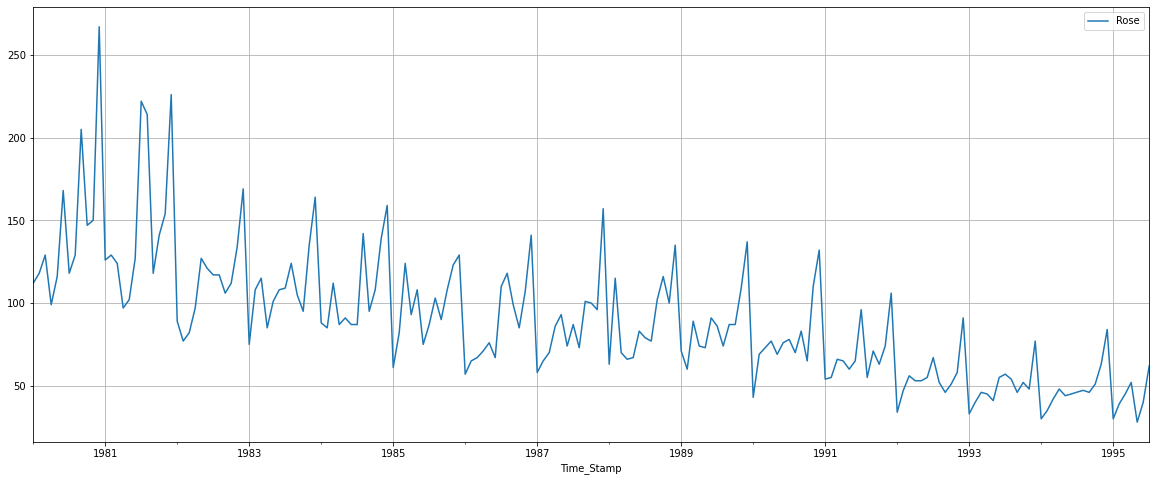

In [ ]:
df_1.plot()
plt.grid();

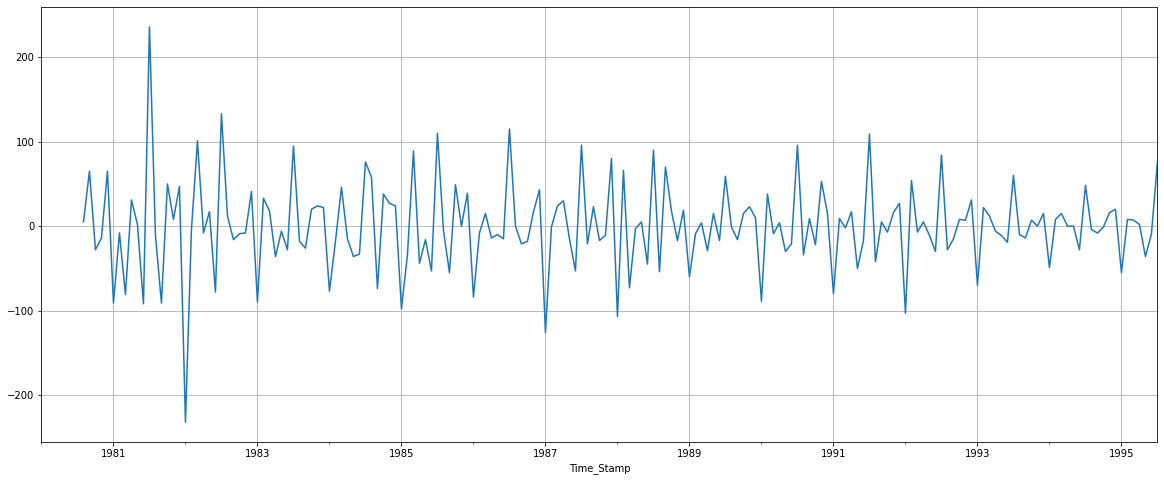

In [ ]:
(df_1['Rose'].diff(6)).diff().plot()
plt.grid();

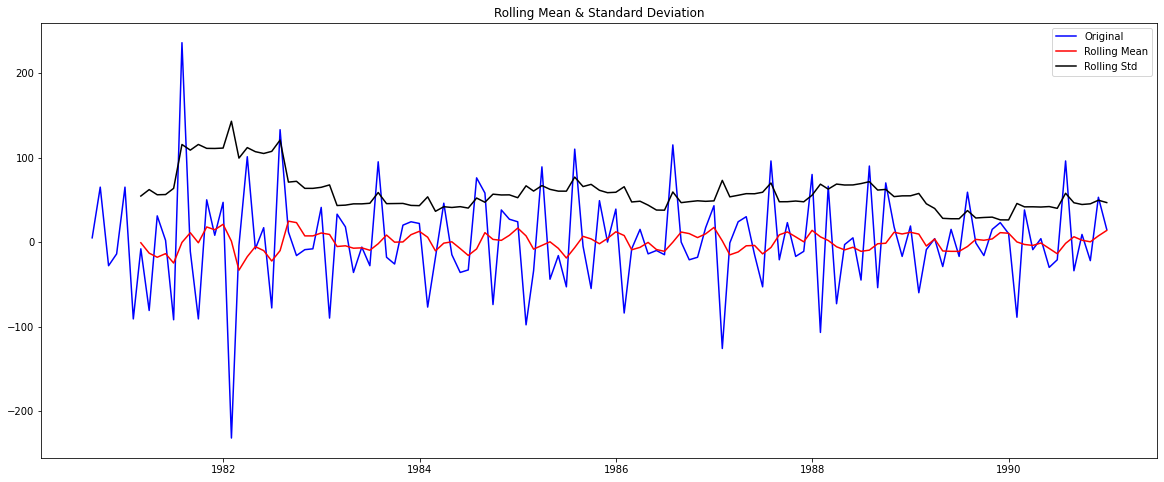

Results of Dickey-Fuller Test:
Test Statistic                -6.882869e+00
p-value                        1.418693e-09
#Lags Used                     1.300000e+01
Number of Observations Used    1.110000e+02
Critical Value (1%)           -3.490683e+00
Critical Value (5%)           -2.887952e+00
Critical Value (10%)          -2.580857e+00
dtype: float64 



In [ ]:
test_stationarity((train['Rose'].diff(6).dropna()).diff(1).dropna())

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning:

invalid value encountered in sqrt



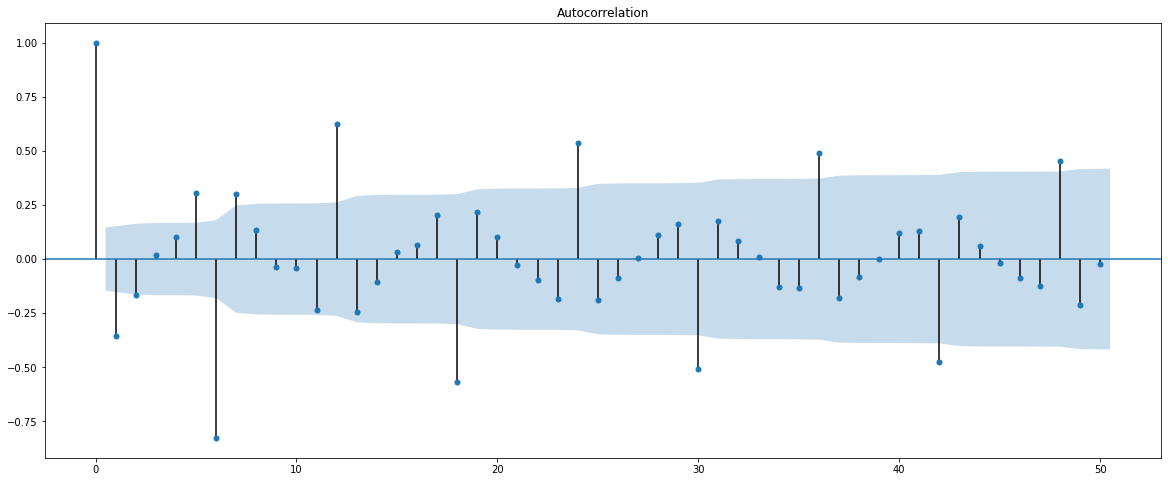

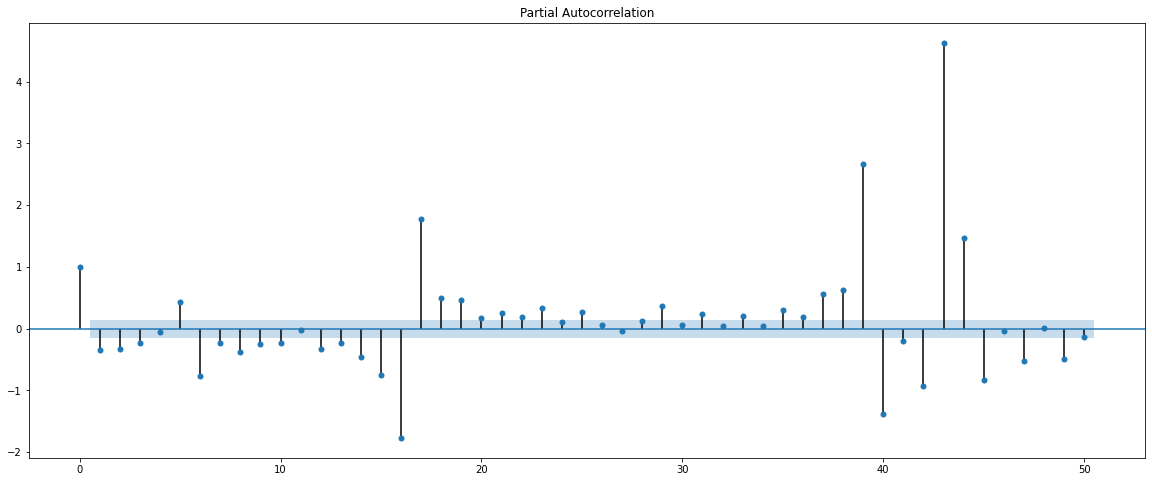

In [ ]:
plot_acf((df_1['Rose'].diff(6).dropna()).diff(1).dropna(),lags=50)
plot_pacf((df_1['Rose'].diff(6).dropna()).diff(1).dropna(),lags=50);

In [ ]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(2,1,3),
                                seasonal_order=(2,1,3,6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                 Statespace Model Results                                
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(2, 1, 3)x(2, 1, 3, 6)   Log Likelihood                -433.595
Date:                           Sat, 07 Nov 2020   AIC                            889.189
Time:                                   22:34:30   BIC                            918.172
Sample:                                        0   HQIC                           900.928
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5746      0.023     25.050      0.000       0.530       0.620
ar.L2         -0.9163      0.021    -43.383

In [ ]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [ ]:
rmse_ms = mean_squared_error(test['Rose'],predicted_manual_SARIMA.predicted_mean,squared=False)
print(rmse_ms)

16.698378438979898


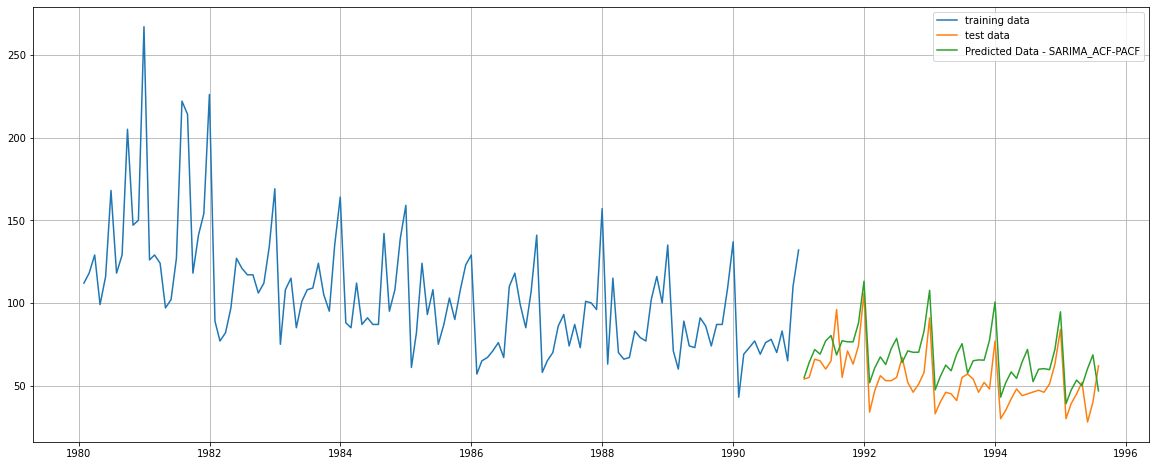

In [ ]:
plt.plot(train,label='training data')
plt.plot(test,label='test data')
plt.plot(test.index,predicted_manual_SARIMA.predicted_mean,label='Predicted Data - SARIMA_ACF-PACF')
plt.legend(loc='best')
plt.grid();

In [ ]:
resultsDf_10 = pd.DataFrame({'Test RMSE': [rmse_ms]}
                           ,index=['SARIMA(2,1,3)(2, 1, 3, 6)_ACF-PACF'])

resultsDf_10

Test RMSE
SARIMA(2,1,3)(2, 1, 3, 6)_ACF-PACF  16.698378

In [ ]:
resultsDf = pd.concat([resultsDf, resultsDf_10])
resultsDf

Test RMSE
RegressionOnTime                                    51.391890
NaiveModel                                          79.672238
SimpleAverageModel                                  53.413057
2pointTrailingMovingAverage                         11.529994
4pointTrailingMovingAverage                         14.444342
6pointTrailingMovingAverage                         14.554944
9pointTrailingMovingAverage                         14.721499
Alpha=0.995,SimpleExponentialSmoothing              79.563308
Alpha=0.07,SimpleExponentialSmoothing               36.387689
Alpha=0.04,Beta=0.47,DoubleExponentialSmoothing     14.549872
Alpha=0.13,Beta=0.01,Gamma=0.0,TripleExponentia...  16.396129
Alpha=0.1,Beta=0.4,Gamma=0.3,TripleExponentialS...  12.090531
ARIMA(0,1,2)_AIC                                    15.604716
SARIMA(1,1,2)(2,1,2,6)_AIC                          18.672531
ARIMA(2,1,4)_ACF-PACF                               22.278720
SARIMA(2,1,3)(2, 1, 3, 6)_ACF-PACF                  16.698378

In [ ]:
resultsDf.sort_values(by=['Test RMSE'],ascending=True)

Test RMSE
2pointTrailingMovingAverage                         11.529994
Alpha=0.1,Beta=0.4,Gamma=0.3,TripleExponentialS...  12.090531
4pointTrailingMovingAverage                         14.444342
Alpha=0.04,Beta=0.47,DoubleExponentialSmoothing     14.549872
6pointTrailingMovingAverage                         14.554944
9pointTrailingMovingAverage                         14.721499
ARIMA(0,1,2)_AIC                                    15.604716
Alpha=0.13,Beta=0.01,Gamma=0.0,TripleExponentia...  16.396129
SARIMA(2,1,3)(2, 1, 3, 6)_ACF-PACF                  16.698378
SARIMA(1,1,2)(2,1,2,6)_AIC                          18.672531
ARIMA(2,1,4)_ACF-PACF                               22.278720
Alpha=0.07,SimpleExponentialSmoothing               36.387689
RegressionOnTime                                    51.391890
SimpleAverageModel                                  53.413057
Alpha=0.995,SimpleExponentialSmoothing              79.563308
NaiveModel                                          79.672238

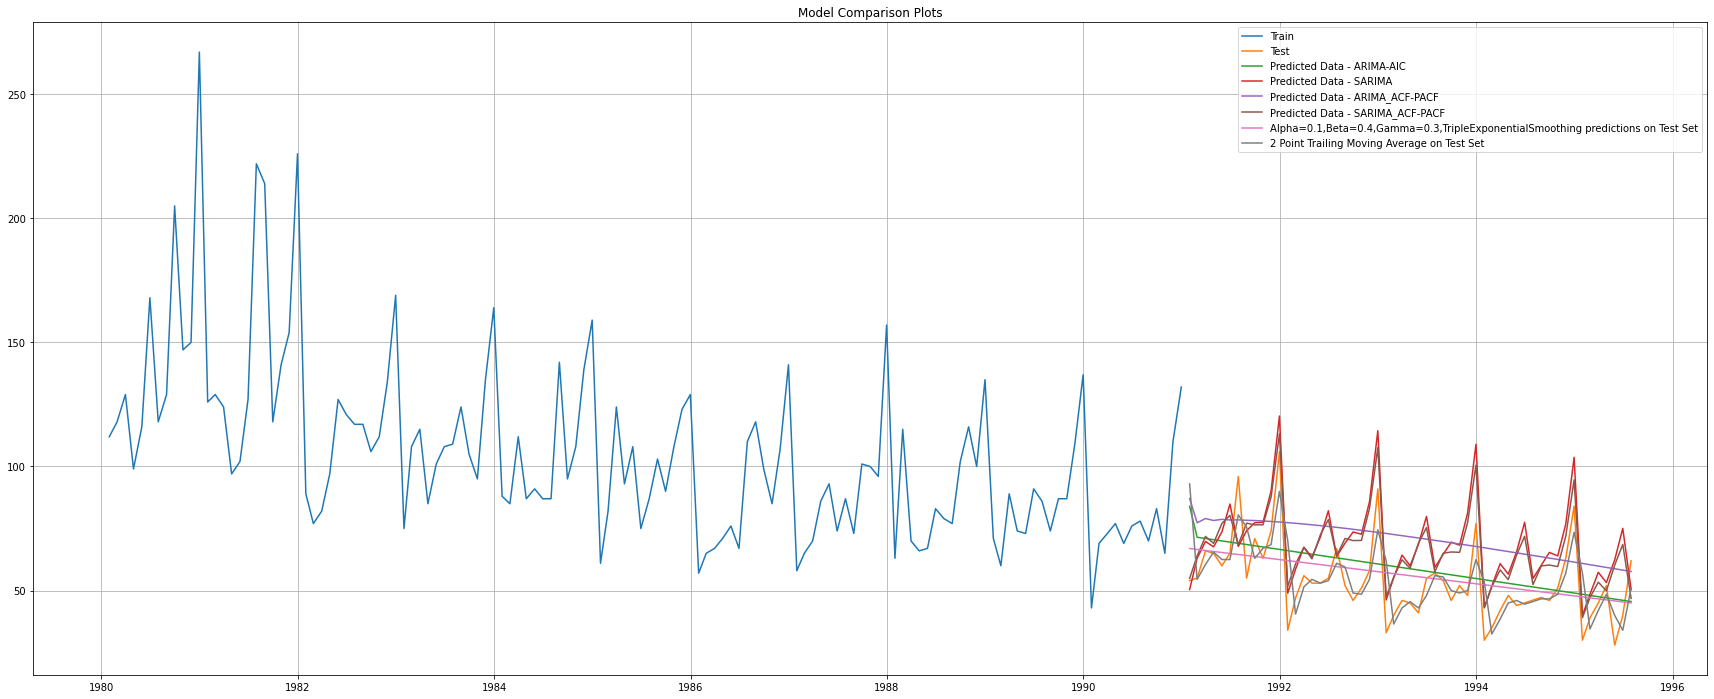

In [ ]:
plt.figure(figsize=(30,12))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(test.index,predicted_auto_ARIMA[0],label='Predicted Data - ARIMA-AIC')

plt.plot(test.index,predicted_auto_SARIMA.predicted_mean,label='Predicted Data - SARIMA')

plt.plot(test.index,predicted_manual_ARIMA[0],label='Predicted Data - ARIMA_ACF-PACF')

plt.plot(test.index,predicted_manual_SARIMA.predicted_mean,label='Predicted Data - SARIMA_ACF-PACF')

plt.plot(DES_test['predict'], label='Alpha=0.1,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')




plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

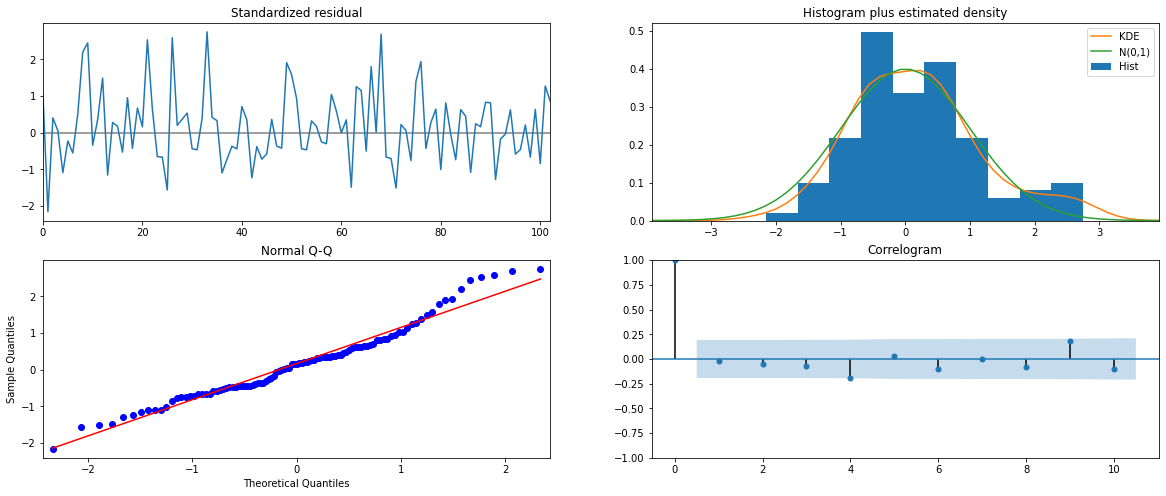

In [ ]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

Evaluate the model on the whole and predict 12 months into the future

In [ ]:
fullmodel1 = ExponentialSmoothing(df_1,
                                  trend='additive',
                                  seasonal='additive').fit(smoothing_level=0.1,
                                                                 smoothing_slope=0.4,
                                                                 smoothing_seasonal=0.3)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



In [ ]:
RMSE_fullmodel1 = metrics.mean_squared_error(df_1['Rose'],fullmodel1.fittedvalues,squared=False)

print('RMSE :',RMSE_fullmodel1)

RMSE : 21.464733341951938


In [ ]:
prediction_1 = fullmodel1.forecast(steps=12)

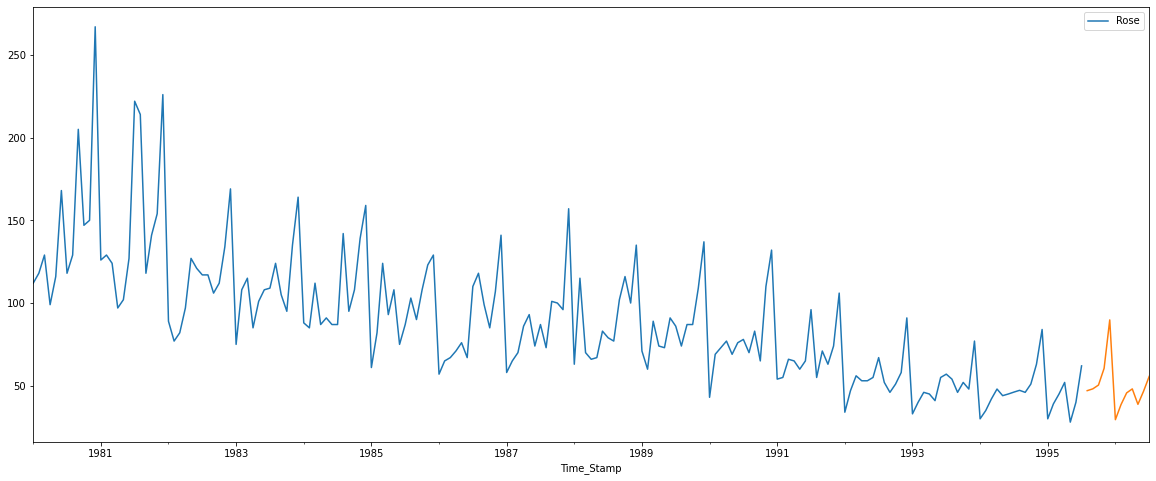

In [ ]:
df_1.plot()
prediction_1.plot();

In [ ]:
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df.head()

lower_CI  prediction    upper_ci
1995-08-31   4.837209   47.021027   89.204846
1995-09-30   5.935998   48.119816   90.303634
1995-10-31   8.223582   50.407400   92.591218
1995-11-30  18.347268   60.531086  102.714905
1995-12-31  47.612266   89.796084  131.979902

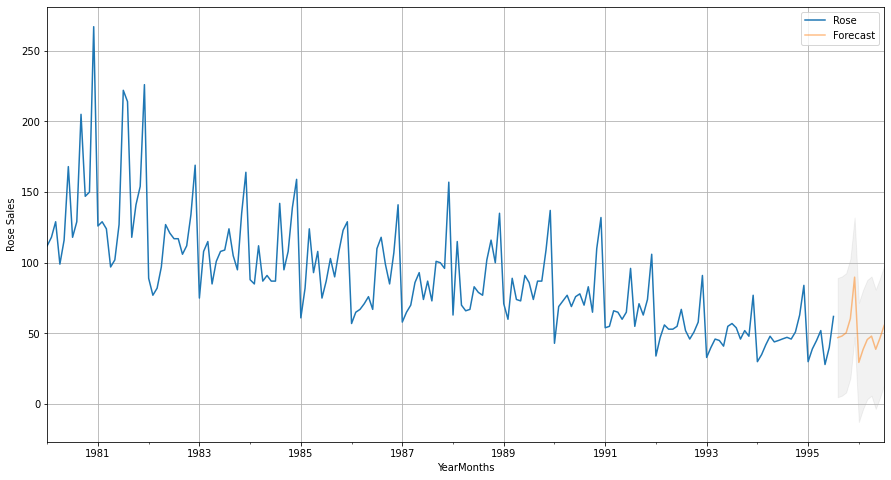

In [ ]:
axis = df_1.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.05)
axis.set_xlabel('YearMonths')
axis.set_ylabel('Rose Sales')
plt.legend(loc='best')
plt.grid()
plt.show()

In [ ]:
fullmodel2 = sm.tsa.statespace.SARIMAX(df_1['Rose'],
                                order=(2,1,3),
                                seasonal_order=(2,1,3,6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = fullmodel2.fit(maxiter=1000)
print(results_full_data_model.summary())


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



                                 Statespace Model Results                                
Dep. Variable:                              Rose   No. Observations:                  187
Model:             SARIMAX(2, 1, 3)x(2, 1, 3, 6)   Log Likelihood                -641.960
Date:                           Sat, 07 Nov 2020   AIC                           1305.921
Time:                                   22:34:41   BIC                           1339.609
Sample:                               01-31-1980   HQIC                          1319.602
                                    - 07-31-1995                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5780      0.015     38.216      0.000       0.548       0.608
ar.L2         -0.9233      0.013    -70.922

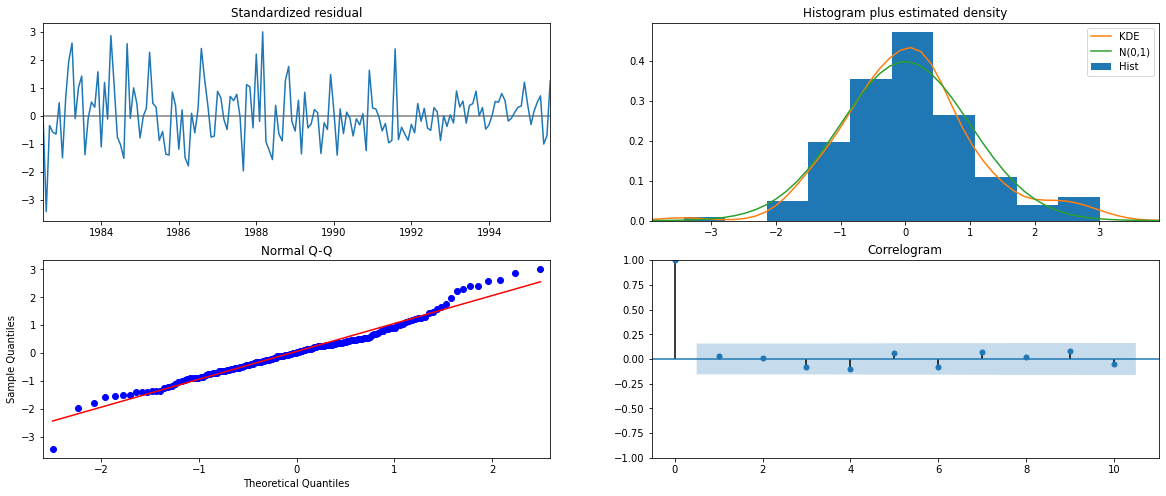

In [ ]:
results_full_data_model.plot_diagnostics();

In [ ]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [ ]:
predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05).head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  45.572336  13.587250      18.941816      72.202857
1995-09-30  44.362546  13.686899      17.536716      71.188376
1995-10-31  54.260333  13.948132      26.922497      81.598168
1995-11-30  55.048440  14.280054      27.060048      83.036831
1995-12-31  76.644949  14.467733      48.288713     105.001185

In [ ]:
RMSE_fullmodel2 = metrics.mean_squared_error(df_1['Rose'],results_full_data_model.fittedvalues,squared=False)

print('RMSE :',RMSE_fullmodel2)


RMSE : 39.03785143549396


In [ ]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-07-31', freq='M'))

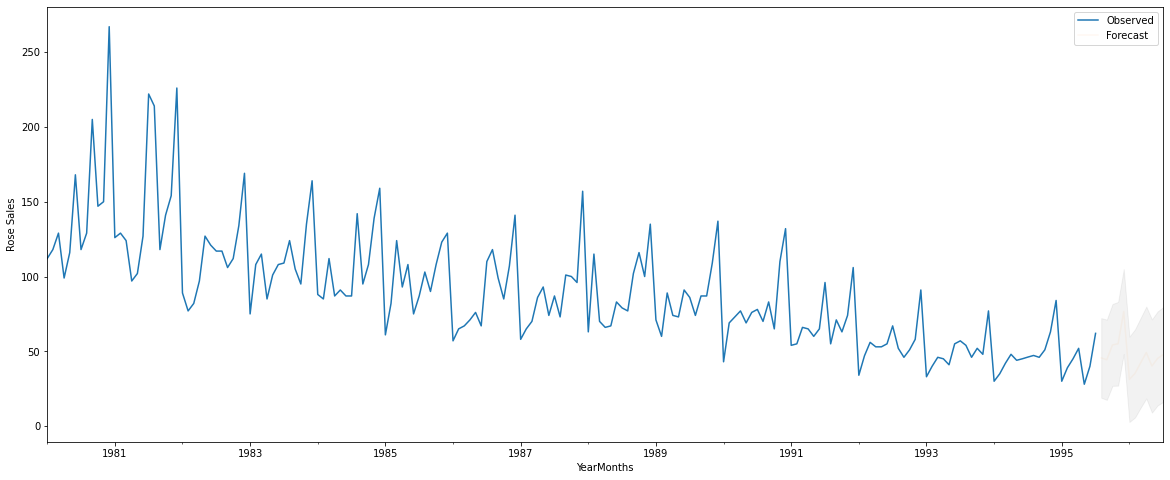

In [ ]:
axis = df_1['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.05)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.05)
axis.set_xlabel('YearMonths')
axis.set_ylabel('Rose Sales')
plt.legend(loc='best')
plt.show()